In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("USA_Housing.csv") 
df.drop("Address",inplace=True,axis=1)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06


In [3]:
df["bias"] = 1

In [4]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'bias'],
      dtype='object')

In [9]:
x1 = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']].values
y = df["Price"].values
scale = MinMaxScaler()
x1= scale.fit_transform(x1) 
y = scale.fit_transform(y.reshape(-1,1)) 
y

array([[0.42521032],
       [0.60736859],
       [0.42519175],
       ...,
       [0.41367241],
       [0.48212679],
       [0.52301078]])

In [31]:
x = []
for i in range(0,len(x1)):
    x.append(np.append(x1[i],[1]))
x = np.array(x)

array([0.53071451, 0.48699729, 0.47267788, 0.46      , 0.66708815,
       1.        ])

In [11]:
x.shape


(5000, 6)

In [12]:
def error(m,f,l):
    error = sum(list(map(lambda x,y:(y-np.matmul(m,x)[0])**2,f,l)))
    return error/float(len(f))


In [13]:
w = np.zeros([1,x.shape[1]])
error(w,x,y)

array([0.26648286])

In [14]:
def grad_step(m_curr,x,y,learn):
    m_gradient = np.zeros([1,x.shape[1]])
    m_current = m_curr
    N = float(len(x))
    # calculating gradient descent for b and m by partial derivative formula 
    for i in range(x.shape[1]):
         m_gradient[0,i] = sum(list(map(lambda x,y:-(2/N) * x[i] * (y - np.matmul(m_current,x)[0]),x,y)))
         m_current[0,i] = m_current[0,i] - learn*m_gradient[0,i]
    return m_current
def gradient_desecent_runner(itera,start_m,learning,f,l):
    w = start_m
   
    for i in range(itera):
        w = grad_step(w,f,l,learning)
        print("initail m:{0},iteration:{1},error{2}".format(w,i,error(w,f,l)))
    return w

In [66]:
def run(x,y):
    epoch = 10000
    learning_rate = .01
    w = np.zeros([1,x.shape[1]])
    intial_error = error(w,x,y)
    print("initail m:{0},error:{1}".format(w,error(w,x,y)))
    w = gradient_desecent_runner(epoch,w,learning_rate,x,y)
    final_error = error(w,x,y)
    print("initail m:{0},error difference:{1},iteration:{2}".format(w,(intial_error-final_error),epoch))
    
    
    
if __name__ == "__main__":
    run(x,y)

initail m:[[0. 0. 0. 0. 0. 0.]],error:[0.26648286]
initail m:[[0.00581915 0.00496279 0.0050166  0.0044266  0.00520135 0.00965818]],iteration:0,error[0.24425476]
initail m:[[0.01138249 0.00970683 0.00980808 0.00864999 0.01017223 0.01887786]],iteration:1,error[0.22397752]
initail m:[[0.01670151 0.01424193 0.01438452 0.01267931 0.01492297 0.0276787 ]],iteration:2,error[0.20547985]
initail m:[[0.02178716 0.01857747 0.01875561 0.01652329 0.01946347 0.03607954]],iteration:3,error[0.18860554]
initail m:[[0.02664993 0.02272241 0.02293055 0.02019024 0.02380316 0.04409832]],iteration:4,error[0.17321206]
initail m:[[0.03129983 0.02668532 0.02691816 0.02368813 0.02795106 0.0517522 ]],iteration:5,error[0.15916942]
initail m:[[0.03574642 0.03047436 0.03072685 0.02702455 0.03191578 0.05905757]],iteration:6,error[0.14635903]
initail m:[[0.03999881 0.03409733 0.03436465 0.03020676 0.03570554 0.06603008]],iteration:7,error[0.13467272]
initail m:[[0.04406574 0.0375617  0.03783925 0.0332417  0.03932821 0.

initail m:[[0.13224213 0.11205104 0.10852891 0.09044101 0.11599381 0.20269009]],iteration:75,error[0.01316589]
initail m:[[0.13253596 0.11228841 0.10868614 0.09048766 0.11621711 0.20287981]],iteration:76,error[0.01314045]
initail m:[[0.13282197 0.11251908 0.10883654 0.09052825 0.11643336 0.20305618]],iteration:77,error[0.01311683]
initail m:[[0.1331005  0.11274335 0.10898042 0.09056305 0.11664287 0.20321978]],iteration:78,error[0.01309487]
initail m:[[0.13337189 0.11296151 0.10911807 0.09059234 0.11684595 0.20337119]],iteration:79,error[0.01307442]
initail m:[[0.13363646 0.11317382 0.10924977 0.09061637 0.11704289 0.20351096]],iteration:80,error[0.01305536]
initail m:[[0.13389451 0.11338055 0.10937579 0.09063537 0.11723395 0.20363961]],iteration:81,error[0.01303756]
initail m:[[0.13414633 0.11358195 0.10949639 0.09064958 0.1174194  0.20375764]],iteration:82,error[0.01302092]
initail m:[[0.13439221 0.11377825 0.10961181 0.09065922 0.1175995  0.20386553]],iteration:83,error[0.01300532]
i

initail m:[[0.14478425 0.12172637 0.11221846 0.08699841 0.12423084 0.20110142]],iteration:149,error[0.01259332]
initail m:[[0.14490769 0.12181745 0.11222988 0.08692094 0.12430072 0.20100303]],iteration:150,error[0.01258892]
initail m:[[0.14503083 0.12190827 0.11224109 0.08684338 0.12437033 0.20090419]],iteration:151,error[0.01258452]
initail m:[[0.14515369 0.12199883 0.1122521  0.08676573 0.12443968 0.20080491]],iteration:152,error[0.01258013]
initail m:[[0.14527627 0.12208916 0.11226293 0.08668802 0.12450879 0.20070522]],iteration:153,error[0.01257575]
initail m:[[0.1453986  0.12217925 0.11227358 0.08661024 0.12457767 0.20060513]],iteration:154,error[0.01257136]
initail m:[[0.14552067 0.12226912 0.11228406 0.0865324  0.12464632 0.20050467]],iteration:155,error[0.01256699]
initail m:[[0.1456425  0.12235877 0.11229439 0.08645452 0.12471475 0.20040384]],iteration:156,error[0.01256262]
initail m:[[0.14576409 0.12244821 0.11230456 0.08637659 0.12478298 0.20030266]],iteration:157,error[0.01

initail m:[[0.15351851 0.12810368 0.11285444 0.08132913 0.1290458  0.19327874]],iteration:223,error[0.01227861]
initail m:[[0.15363374 0.12818719 0.11286251 0.08125542 0.12910841 0.19317021]],iteration:224,error[0.01227449]
initail m:[[0.15374892 0.12827065 0.11287059 0.08118182 0.12917098 0.19306166]],iteration:225,error[0.01227037]
initail m:[[0.15386406 0.12835408 0.11287868 0.08110831 0.12923352 0.19295309]],iteration:226,error[0.01226625]
initail m:[[0.15397916 0.12843745 0.11288679 0.0810349  0.12929603 0.1928445 ]],iteration:227,error[0.01226214]
initail m:[[0.15409422 0.12852079 0.11289491 0.08096159 0.1293585  0.19273589]],iteration:228,error[0.01225802]
initail m:[[0.15420923 0.12860408 0.11290304 0.08088837 0.12942093 0.19262726]],iteration:229,error[0.01225392]
initail m:[[0.1543242  0.12868733 0.11291119 0.08081526 0.12948333 0.19251862]],iteration:230,error[0.01224981]
initail m:[[0.15443914 0.12877054 0.11291935 0.08074224 0.12954569 0.19240996]],iteration:231,error[0.01

initail m:[[0.16194404 0.1341782  0.11349557 0.07614146 0.13359409 0.18521586]],iteration:297,error[0.01198155]
initail m:[[0.16205661 0.13425893 0.11350491 0.076075   0.13365448 0.18510665]],iteration:298,error[0.01197764]
initail m:[[0.16216915 0.13433963 0.11351426 0.07600863 0.13371485 0.18499744]],iteration:299,error[0.01197374]
initail m:[[0.16228165 0.1344203  0.11352363 0.07594236 0.13377519 0.18488822]],iteration:300,error[0.01196984]
initail m:[[0.16239412 0.13450093 0.11353302 0.07587618 0.1338355  0.18477899]],iteration:301,error[0.01196594]
initail m:[[0.16250656 0.13458152 0.11354242 0.07581009 0.13389578 0.18466977]],iteration:302,error[0.01196204]
initail m:[[0.16261897 0.13466208 0.11355185 0.0757441  0.13395604 0.18456053]],iteration:303,error[0.01195815]
initail m:[[0.16273134 0.13474261 0.11356129 0.0756782  0.13401627 0.1844513 ]],iteration:304,error[0.01195426]
initail m:[[0.16284368 0.1348231  0.11357075 0.0756124  0.13407648 0.18434206]],iteration:305,error[0.01

initail m:[[0.1701879  0.14006148 0.11423412 0.07147005 0.13799271 0.17712573]],iteration:371,error[0.01169955]
initail m:[[0.17029813 0.14013975 0.11424474 0.07141023 0.1380512  0.17701632]],iteration:372,error[0.01169583]
initail m:[[0.17040833 0.14021798 0.11425539 0.0713505  0.13810967 0.17690691]],iteration:373,error[0.01169211]
initail m:[[0.1705185  0.14029619 0.11426605 0.07129085 0.13816811 0.17679749]],iteration:374,error[0.0116884]
initail m:[[0.17062864 0.14037436 0.11427672 0.07123129 0.13822653 0.17668807]],iteration:375,error[0.01168469]
initail m:[[0.17073874 0.1404525  0.11428742 0.07117181 0.13828492 0.17657866]],iteration:376,error[0.01168099]
initail m:[[0.17084882 0.1405306  0.11429813 0.07111242 0.13834329 0.17646924]],iteration:377,error[0.01167728]
initail m:[[0.17095887 0.14060868 0.11430885 0.07105311 0.13840163 0.17635982]],iteration:378,error[0.01167358]
initail m:[[0.17106889 0.14068672 0.1143196  0.07099389 0.13845995 0.1762504 ]],iteration:379,error[0.011

initail m:[[0.17826369 0.14576786 0.11506423 0.06726583 0.14225613 0.16902698]],iteration:445,error[0.01143079]
initail m:[[0.17837171 0.14584381 0.11507603 0.067212   0.14231287 0.16891753]],iteration:446,error[0.01142724]
initail m:[[0.1784797  0.14591973 0.11508785 0.06715824 0.14236958 0.16880808]],iteration:447,error[0.0114237]
initail m:[[0.17858767 0.14599562 0.11509969 0.06710456 0.14242627 0.16869864]],iteration:448,error[0.01142015]
initail m:[[0.17869561 0.14607148 0.11511154 0.06705095 0.14248293 0.16858919]],iteration:449,error[0.01141661]
initail m:[[0.17880351 0.14614731 0.11512341 0.06699742 0.14253958 0.16847974]],iteration:450,error[0.01141307]
initail m:[[0.17891139 0.14622311 0.11513529 0.06694397 0.1425962  0.16837029]],iteration:451,error[0.01140954]
initail m:[[0.17901924 0.14629887 0.11514719 0.06689059 0.1426528  0.16826085]],iteration:452,error[0.011406]
initail m:[[0.17912707 0.14637461 0.1151591  0.06683729 0.14270938 0.1681514 ]],iteration:453,error[0.01140

initail m:[[0.18618039 0.15130755 0.1159776  0.06348195 0.14639437 0.16093051]],iteration:519,error[0.0111738]
initail m:[[0.18628632 0.15138131 0.11599048 0.0634335  0.14644948 0.16082116]],iteration:520,error[0.0111704]
initail m:[[0.18639223 0.15145504 0.11600337 0.06338511 0.14650457 0.16071181]],iteration:521,error[0.011167]
initail m:[[0.1864981  0.15152875 0.11601628 0.0633368  0.14655963 0.16060246]],iteration:522,error[0.01116361]
initail m:[[0.18660395 0.15160243 0.1160292  0.06328855 0.14661468 0.16049312]],iteration:523,error[0.01116021]
initail m:[[0.18670977 0.15167607 0.11604213 0.06324037 0.1466697  0.16038378]],iteration:524,error[0.01115682]
initail m:[[0.18681557 0.15174969 0.11605507 0.06319226 0.1467247  0.16027444]],iteration:525,error[0.01115343]
initail m:[[0.18692133 0.15182328 0.11606803 0.06314422 0.14677968 0.1601651 ]],iteration:526,error[0.01115005]
initail m:[[0.18702707 0.15189685 0.11608101 0.06309624 0.14683464 0.16005576]],iteration:527,error[0.011146

initail m:[[0.19394609 0.1566898  0.11696661 0.06007611 0.15041641 0.15284581]],iteration:593,error[0.01092731]
initail m:[[0.19405003 0.1567615  0.11698046 0.06003249 0.15047001 0.15273667]],iteration:594,error[0.01092405]
initail m:[[0.19415394 0.15683316 0.11699432 0.05998894 0.15052358 0.15262754]],iteration:595,error[0.01092078]
initail m:[[0.19425783 0.15690481 0.1170082  0.05994545 0.15057714 0.15251842]],iteration:596,error[0.01091752]
initail m:[[0.1943617  0.15697642 0.11702209 0.05990202 0.15063067 0.1524093 ]],iteration:597,error[0.01091427]
initail m:[[0.19446554 0.15704801 0.11703599 0.05985865 0.15068419 0.15230018]],iteration:598,error[0.01091101]
initail m:[[0.19456935 0.15711956 0.1170499  0.05981534 0.15073768 0.15219107]],iteration:599,error[0.01090775]
initail m:[[0.19467313 0.1571911  0.11706382 0.05977209 0.15079116 0.15208196]],iteration:600,error[0.0109045]
initail m:[[0.19477689 0.1572626  0.11707776 0.05972891 0.15084462 0.15197285]],iteration:601,error[0.010

initail m:[[0.20156813 0.16192312 0.1180243  0.05701019 0.15433035 0.1447813 ]],iteration:667,error[0.01069031]
initail m:[[0.20167018 0.16199286 0.11803903 0.05697093 0.15438254 0.14467249]],iteration:668,error[0.01068716]
initail m:[[0.2017722  0.16206257 0.11805378 0.05693172 0.15443471 0.14456369]],iteration:669,error[0.01068402]
initail m:[[0.2018742  0.16213226 0.11806853 0.05689256 0.15448685 0.14445489]],iteration:670,error[0.01068088]
initail m:[[0.20197617 0.16220192 0.1180833  0.05685346 0.15453898 0.1443461 ]],iteration:671,error[0.01067775]
initail m:[[0.20207812 0.16227155 0.11809808 0.05681442 0.1545911  0.14423732]],iteration:672,error[0.01067461]
initail m:[[0.20218004 0.16234116 0.11811287 0.05677543 0.15464319 0.14412853]],iteration:673,error[0.01067148]
initail m:[[0.20228194 0.16241075 0.11812767 0.0567365  0.15469527 0.14401976]],iteration:674,error[0.01066834]
initail m:[[0.20238382 0.1624803  0.11814248 0.05669762 0.15474732 0.14391099]],iteration:675,error[0.01

initail m:[[0.20905324 0.16701533 0.11914434 0.05424989 0.15814353 0.13674445]],iteration:741,error[0.01046192]
initail m:[[0.20915348 0.16708321 0.11915988 0.05421453 0.15819441 0.13663607]],iteration:742,error[0.01045888]
initail m:[[0.2092537  0.16715107 0.11917542 0.05417923 0.15824526 0.13652769]],iteration:743,error[0.01045585]
initail m:[[0.20935389 0.1672189  0.11919098 0.05414397 0.1582961  0.13641932]],iteration:744,error[0.01045283]
initail m:[[0.20945406 0.16728671 0.11920655 0.05410877 0.15834692 0.13631095]],iteration:745,error[0.0104498]
initail m:[[0.20955421 0.16735449 0.11922212 0.05407362 0.15839772 0.13620259]],iteration:746,error[0.01044678]
initail m:[[0.20965433 0.16742225 0.11923771 0.05403851 0.1584485  0.13609424]],iteration:747,error[0.01044375]
initail m:[[0.20975443 0.16748999 0.11925331 0.05400346 0.15849927 0.13598589]],iteration:748,error[0.01044073]
initail m:[[0.2098545  0.1675577  0.11926892 0.05396845 0.15855002 0.13587755]],iteration:749,error[0.010

initail m:[[0.21650608 0.17203974 0.12033726 0.05173245 0.16191224 0.12863401]],iteration:816,error[0.01023848]
initail m:[[0.21660457 0.17210584 0.12035353 0.05170066 0.16196187 0.12852614]],iteration:817,error[0.01023556]
initail m:[[0.21670303 0.17217191 0.12036981 0.05166891 0.16201148 0.12841827]],iteration:818,error[0.01023263]
initail m:[[0.21680148 0.17223796 0.1203861  0.05163721 0.16206107 0.12831041]],iteration:819,error[0.01022971]
initail m:[[0.2168999  0.17230398 0.1204024  0.05160555 0.16211065 0.12820256]],iteration:820,error[0.01022678]
initail m:[[0.2169983  0.17236998 0.12041871 0.05157393 0.16216021 0.12809472]],iteration:821,error[0.01022386]
initail m:[[0.21709668 0.17243596 0.12043503 0.05154236 0.16220976 0.12798688]],iteration:822,error[0.01022094]
initail m:[[0.21719503 0.17250192 0.12045136 0.05151084 0.16225928 0.12787905]],iteration:823,error[0.01021802]
initail m:[[0.21729336 0.17256785 0.1204677  0.05147936 0.1623088  0.12777123]],iteration:824,error[0.01

initail m:[[0.22373358 0.17686907 0.12156593 0.0494969  0.16554206 0.12067215]],iteration:890,error[0.01002535]
initail m:[[0.22383041 0.17693349 0.12158286 0.04946826 0.16559054 0.12056485]],iteration:891,error[0.01002252]
initail m:[[0.22392723 0.17699788 0.1215998  0.04943966 0.165639   0.12045757]],iteration:892,error[0.01001969]
initail m:[[0.22402402 0.17706226 0.12161675 0.0494111  0.16568744 0.12035029]],iteration:893,error[0.01001686]
initail m:[[0.22412079 0.17712661 0.12163371 0.04938258 0.16573587 0.12024303]],iteration:894,error[0.01001403]
initail m:[[0.22421754 0.17719094 0.12165068 0.0493541  0.16578428 0.12013577]],iteration:895,error[0.0100112]
initail m:[[0.22431427 0.17725525 0.12166765 0.04932566 0.16583268 0.12002851]],iteration:896,error[0.01000837]
initail m:[[0.22441097 0.17731954 0.12168464 0.04929727 0.16588107 0.11992127]],iteration:897,error[0.01000555]
initail m:[[0.22450766 0.1773838  0.12170163 0.04926891 0.16592944 0.11981404]],iteration:898,error[0.010

initail m:[[0.23084113 0.1815773  0.12284113 0.04748285 0.16908931 0.11275562]],iteration:964,error[0.00981897]
initail m:[[0.23093638 0.18164012 0.12285866 0.04745704 0.1691367  0.11264897]],iteration:965,error[0.00981622]
initail m:[[0.23103161 0.18170293 0.1228762  0.04743127 0.16918408 0.11254233]],iteration:966,error[0.00981348]
initail m:[[0.23112682 0.18176571 0.12289375 0.04740554 0.16923145 0.1124357 ]],iteration:967,error[0.00981073]
initail m:[[0.231222   0.18182846 0.1229113  0.04737984 0.1692788  0.11232908]],iteration:968,error[0.00980799]
initail m:[[0.23131717 0.1818912  0.12292886 0.04735418 0.16932613 0.11222247]],iteration:969,error[0.00980525]
initail m:[[0.23141231 0.18195392 0.12294643 0.04732855 0.16937346 0.11211587]],iteration:970,error[0.00980251]
initail m:[[0.23150743 0.18201662 0.12296401 0.04730296 0.16942076 0.11200928]],iteration:971,error[0.00979978]
initail m:[[0.23160254 0.18207929 0.12298159 0.04727741 0.16946806 0.11190269]],iteration:972,error[0.00

initail m:[[0.23783346 0.1861701  0.12415851 0.04566776 0.17255892 0.10488894]],iteration:1038,error[0.00961888]
initail m:[[0.23792719 0.18623139 0.12417659 0.0456445  0.17260529 0.104783  ]],iteration:1039,error[0.00961622]
initail m:[[0.23802089 0.18629267 0.12419467 0.04562127 0.17265166 0.10467706]],iteration:1040,error[0.00961356]
initail m:[[0.23811457 0.18635393 0.12421275 0.04559808 0.17269801 0.10457114]],iteration:1041,error[0.0096109]
initail m:[[0.23820823 0.18641517 0.12423085 0.04557491 0.17274434 0.10446522]],iteration:1042,error[0.00960824]
initail m:[[0.23830187 0.18647639 0.12424895 0.04555178 0.17279067 0.10435931]],iteration:1043,error[0.00960558]
initail m:[[0.2383955  0.18653759 0.12426705 0.04552868 0.17283698 0.10425341]],iteration:1044,error[0.00960292]
initail m:[[0.2384891  0.18659876 0.12428517 0.04550561 0.17288327 0.10414753]],iteration:1045,error[0.00960027]
initail m:[[0.23858268 0.18665992 0.12430329 0.04548258 0.17292955 0.10404165]],iteration:1046,er

initail m:[[0.24471491 0.19065267 0.1255141  0.04403136 0.17595538 0.09707607]],iteration:1112,error[0.00942472]
initail m:[[0.24480716 0.19071252 0.12553266 0.04401039 0.1760008  0.09697088]],iteration:1113,error[0.00942214]
initail m:[[0.24489939 0.19077234 0.12555123 0.04398944 0.1760462  0.09686569]],iteration:1114,error[0.00941955]
initail m:[[0.24499161 0.19083214 0.12556981 0.04396852 0.17609159 0.09676052]],iteration:1115,error[0.00941697]
initail m:[[0.2450838  0.19089193 0.12558839 0.04394764 0.17613697 0.09665536]],iteration:1116,error[0.00941439]
initail m:[[0.24517597 0.1909517  0.12560698 0.04392678 0.17618234 0.09655021]],iteration:1117,error[0.00941181]
initail m:[[0.24526813 0.19101144 0.12562557 0.04390595 0.17622769 0.09644506]],iteration:1118,error[0.00940923]
initail m:[[0.24536026 0.19107117 0.12564418 0.04388515 0.17627303 0.09633993]],iteration:1119,error[0.00940665]
initail m:[[0.24545238 0.19113088 0.12566278 0.04386437 0.17631836 0.09623481]],iteration:1120,e

initail m:[[0.25148946 0.19502987 0.12690427 0.04255539 0.17928276 0.08932046]],iteration:1186,error[0.00923615]
initail m:[[0.2515803  0.19508832 0.12692327 0.04253647 0.17932727 0.08921606]],iteration:1187,error[0.00923364]
initail m:[[0.25167111 0.19514676 0.12694229 0.04251757 0.17937176 0.08911167]],iteration:1188,error[0.00923113]
initail m:[[0.25176191 0.19520517 0.12696131 0.0424987  0.17941625 0.0890073 ]],iteration:1189,error[0.00922862]
initail m:[[0.25185268 0.19526356 0.12698033 0.04247985 0.17946072 0.08890293]],iteration:1190,error[0.00922611]
initail m:[[0.25194344 0.19532194 0.12699936 0.04246103 0.17950518 0.08879857]],iteration:1191,error[0.0092236]
initail m:[[0.25203418 0.1953803  0.1270184  0.04244224 0.17954963 0.08869423]],iteration:1192,error[0.00922109]
initail m:[[0.2521249  0.19543864 0.12703744 0.04242347 0.17959407 0.0885899 ]],iteration:1193,error[0.00921859]
initail m:[[0.2522156  0.19549696 0.12705648 0.04240473 0.1796385  0.08848558]],iteration:1194,er

initail m:[[0.2581608  0.19930619 0.1283257  0.04122341 0.18254475 0.08162511]],iteration:1260,error[0.00905287]
initail m:[[0.25825026 0.19936331 0.12834511 0.04120633 0.1825884  0.08152154]],iteration:1261,error[0.00905043]
initail m:[[0.25833971 0.19942041 0.12836452 0.04118927 0.18263204 0.08141798]],iteration:1262,error[0.00904799]
initail m:[[0.25842913 0.19947749 0.12838394 0.04117223 0.18267567 0.08131444]],iteration:1263,error[0.00904555]
initail m:[[0.25851854 0.19953455 0.12840336 0.04115522 0.18271928 0.08121091]],iteration:1264,error[0.00904311]
initail m:[[0.25860793 0.1995916  0.12842279 0.04113823 0.18276289 0.08110739]],iteration:1265,error[0.00904067]
initail m:[[0.2586973  0.19964863 0.12844223 0.04112126 0.18280648 0.08100388]],iteration:1266,error[0.00903824]
initail m:[[0.25878666 0.19970564 0.12846166 0.04110432 0.18285006 0.08090038]],iteration:1267,error[0.0090358]
initail m:[[0.25887599 0.19976263 0.12848111 0.0410874  0.18289363 0.0807969 ]],iteration:1268,er

initail m:[[0.26464417 0.20342994 0.1297556  0.04003608 0.18570189 0.07409532]],iteration:1333,error[0.00887702]
initail m:[[0.26473233 0.2034858  0.12977536 0.04002062 0.18574473 0.0739926 ]],iteration:1334,error[0.00887464]
initail m:[[0.26482046 0.20354164 0.12979513 0.04000519 0.18578756 0.0738899 ]],iteration:1335,error[0.00887227]
initail m:[[0.26490858 0.20359746 0.12981491 0.03998978 0.18583039 0.07378721]],iteration:1336,error[0.00886989]
initail m:[[0.26499668 0.20365326 0.12983469 0.03997439 0.1858732  0.07368454]],iteration:1337,error[0.00886752]
initail m:[[0.26508476 0.20370905 0.12985447 0.03995902 0.185916   0.07358187]],iteration:1338,error[0.00886515]
initail m:[[0.26517283 0.20376481 0.12987426 0.03994368 0.18595879 0.07347922]],iteration:1339,error[0.00886278]
initail m:[[0.26526087 0.20382057 0.12989405 0.03992835 0.18600157 0.07337658]],iteration:1340,error[0.00886041]
initail m:[[0.2653489  0.2038763  0.12991385 0.03991304 0.18604433 0.07327395]],iteration:1341,e

initail m:[[0.27112031 0.20751796 0.13123039 0.03894769 0.18884369 0.06652701]],iteration:1407,error[0.00870354]
initail m:[[0.27120717 0.20757258 0.13125048 0.03893372 0.18888575 0.06642519]],iteration:1408,error[0.00870123]
initail m:[[0.27129402 0.20762719 0.13127058 0.03891977 0.18892781 0.06632338]],iteration:1409,error[0.00869892]
initail m:[[0.27138086 0.20768178 0.13129068 0.03890584 0.18896985 0.06622158]],iteration:1410,error[0.00869661]
initail m:[[0.27146767 0.20773636 0.13131078 0.03889192 0.18901189 0.0661198 ]],iteration:1411,error[0.0086943]
initail m:[[0.27155447 0.20779092 0.13133089 0.03887803 0.18905391 0.06601803]],iteration:1412,error[0.00869199]
initail m:[[0.27164125 0.20784546 0.131351   0.03886415 0.18909593 0.06591627]],iteration:1413,error[0.00868968]
initail m:[[0.27172802 0.20789999 0.13137112 0.0388503  0.18913793 0.06581452]],iteration:1414,error[0.00868737]
initail m:[[0.27181476 0.2079545  0.13139124 0.03883646 0.18917993 0.06571279]],iteration:1415,er

initail m:[[0.27750264 0.21151672 0.13272812 0.03796336 0.19192928 0.05902566]],iteration:1481,error[0.00853468]
initail m:[[0.27758826 0.21157017 0.13274851 0.03795072 0.19197061 0.05892476]],iteration:1482,error[0.00853243]
initail m:[[0.27767386 0.21162359 0.1327689  0.03793809 0.19201192 0.05882387]],iteration:1483,error[0.00853018]
initail m:[[0.27775944 0.211677   0.13278929 0.03792549 0.19205322 0.05872299]],iteration:1484,error[0.00852793]
initail m:[[0.27784501 0.2117304  0.13280969 0.0379129  0.19209452 0.05862212]],iteration:1485,error[0.00852568]
initail m:[[0.27793056 0.21178378 0.13283009 0.03790033 0.1921358  0.05852127]],iteration:1486,error[0.00852344]
initail m:[[0.2780161  0.21183714 0.13285049 0.03788777 0.19217708 0.05842043]],iteration:1487,error[0.00852119]
initail m:[[0.27810162 0.21189049 0.1328709  0.03787523 0.19221835 0.0583196 ]],iteration:1488,error[0.00851894]
initail m:[[0.27818712 0.21194382 0.13289131 0.03786271 0.1922596  0.05821878]],iteration:1489,e

initail m:[[0.28379387 0.21542962 0.13424646 0.03707228 0.19496122 0.05159289]],iteration:1555,error[0.00837026]
initail m:[[0.28387828 0.21548192 0.13426711 0.03706084 0.19500184 0.05149292]],iteration:1556,error[0.00836807]
initail m:[[0.28396267 0.21553421 0.13428776 0.0370494  0.19504244 0.05139297]],iteration:1557,error[0.00836588]
initail m:[[0.28404704 0.21558649 0.13430842 0.03703798 0.19508304 0.05129303]],iteration:1558,error[0.00836369]
initail m:[[0.28413139 0.21563875 0.13432908 0.03702658 0.19512363 0.0511931 ]],iteration:1559,error[0.0083615]
initail m:[[0.28421573 0.21569099 0.13434974 0.03701519 0.19516421 0.05109318]],iteration:1560,error[0.00835931]
initail m:[[0.28430006 0.21574322 0.13437041 0.03700382 0.19520477 0.05099328]],iteration:1561,error[0.00835712]
initail m:[[0.28438437 0.21579543 0.13439108 0.03699246 0.19524533 0.05089339]],iteration:1562,error[0.00835493]
initail m:[[0.28446866 0.21584763 0.13441175 0.03698112 0.19528588 0.05079351]],iteration:1563,er

initail m:[[0.28999652 0.21925981 0.13578326 0.03626476 0.19794183 0.04423005]],iteration:1629,error[0.00821011]
initail m:[[0.29007974 0.21931102 0.13580415 0.03625438 0.19798177 0.04413104]],iteration:1630,error[0.00820797]
initail m:[[0.29016295 0.21936221 0.13582503 0.03624402 0.1980217  0.04403204]],iteration:1631,error[0.00820584]
initail m:[[0.29024614 0.21941339 0.13584592 0.03623366 0.19806162 0.04393305]],iteration:1632,error[0.0082037]
initail m:[[0.29032932 0.21946455 0.13586682 0.03622332 0.19810153 0.04383407]],iteration:1633,error[0.00820157]
initail m:[[0.29041248 0.2195157  0.13588771 0.03621299 0.19814143 0.04373511]],iteration:1634,error[0.00819944]
initail m:[[0.29049563 0.21956684 0.13590861 0.03620268 0.19818132 0.04363616]],iteration:1635,error[0.00819731]
initail m:[[0.29057876 0.21961796 0.13592952 0.03619238 0.1982212  0.04353723]],iteration:1636,error[0.00819517]
initail m:[[0.29066187 0.21966906 0.13595042 0.03618209 0.19826108 0.04343831]],iteration:1637,er

initail m:[[0.29611292 0.22301026 0.13733655 0.03553206 0.20087325 0.03693826]],iteration:1703,error[0.00805407]
initail m:[[0.296195   0.22306041 0.13735764 0.03552263 0.20091253 0.03684021]],iteration:1704,error[0.00805199]
initail m:[[0.29627705 0.22311055 0.13737874 0.03551322 0.20095181 0.03674217]],iteration:1705,error[0.00804991]
initail m:[[0.2963591  0.22316067 0.13739984 0.03550382 0.20099108 0.03664415]],iteration:1706,error[0.00804783]
initail m:[[0.29644113 0.22321077 0.13742094 0.03549443 0.20103034 0.03654615]],iteration:1707,error[0.00804575]
initail m:[[0.29652314 0.22326087 0.13744205 0.03548505 0.20106959 0.03644815]],iteration:1708,error[0.00804367]
initail m:[[0.29660513 0.22331095 0.13746316 0.03547569 0.20110883 0.03635017]],iteration:1709,error[0.0080416]
initail m:[[0.29668712 0.22336101 0.13748427 0.03546633 0.20114807 0.0362522 ]],iteration:1710,error[0.00803952]
initail m:[[0.29676908 0.22341106 0.13750538 0.03545699 0.20118729 0.03615425]],iteration:1711,er

initail m:[[0.3020643  0.22663461 0.13888323 0.0348749  0.20371874 0.02981549]],iteration:1776,error[0.00790404]
initail m:[[0.30214527 0.22668375 0.13890451 0.03486632 0.2037574  0.02971841]],iteration:1777,error[0.00790201]
initail m:[[0.30222622 0.22673288 0.13892579 0.03485775 0.20379606 0.02962134]],iteration:1778,error[0.00789999]
initail m:[[0.30230716 0.22678199 0.13894708 0.03484919 0.20383472 0.02952428]],iteration:1779,error[0.00789796]
initail m:[[0.30238808 0.22683109 0.13896836 0.03484064 0.20387336 0.02942724]],iteration:1780,error[0.00789593]
initail m:[[0.30246899 0.22688017 0.13898965 0.0348321  0.20391199 0.02933021]],iteration:1781,error[0.00789391]
initail m:[[0.30254988 0.22692925 0.13901094 0.03482357 0.20395062 0.0292332 ]],iteration:1782,error[0.00789188]
initail m:[[0.30263075 0.22697831 0.13903223 0.03481506 0.20398924 0.02913619]],iteration:1783,error[0.00788986]
initail m:[[0.30271162 0.22702735 0.13905353 0.03480655 0.20402785 0.0290392 ]],iteration:1784,e

initail m:[[0.30801573 0.23023472 0.14046403 0.0342683  0.20655803 0.02266733]],iteration:1850,error[0.00775578]
initail m:[[0.3080956  0.23028288 0.14048548 0.03426048 0.2065961  0.02257123]],iteration:1851,error[0.0077538]
initail m:[[0.30817545 0.23033102 0.14050692 0.03425267 0.20663415 0.02247515]],iteration:1852,error[0.00775183]
initail m:[[0.3082553  0.23037914 0.14052837 0.03424488 0.2066722  0.02237908]],iteration:1853,error[0.00774985]
initail m:[[0.30833512 0.23042725 0.14054982 0.03423709 0.20671024 0.02228302]],iteration:1854,error[0.00774787]
initail m:[[0.30841494 0.23047535 0.14057127 0.03422931 0.20674828 0.02218698]],iteration:1855,error[0.0077459]
initail m:[[0.30849474 0.23052344 0.14059273 0.03422154 0.2067863  0.02209095]],iteration:1856,error[0.00774393]
initail m:[[0.30857452 0.23057151 0.14061419 0.03421379 0.20682432 0.02199493]],iteration:1857,error[0.00774195]
initail m:[[0.30865429 0.23061957 0.14063564 0.03420604 0.20686233 0.02189893]],iteration:1858,err

initail m:[[0.31388703 0.23376291 0.14205632 0.03371532 0.20935348 0.01559236]],iteration:1924,error[0.00761125]
initail m:[[0.31396583 0.2338101  0.14207791 0.03370819 0.20939096 0.01549726]],iteration:1925,error[0.00760932]
initail m:[[0.31404462 0.23385729 0.1420995  0.03370107 0.20942843 0.01540217]],iteration:1926,error[0.00760739]
initail m:[[0.31412339 0.23390446 0.14212109 0.03369395 0.2094659  0.01530709]],iteration:1927,error[0.00760546]
initail m:[[0.31420215 0.23395161 0.14214269 0.03368685 0.20950336 0.01521203]],iteration:1928,error[0.00760354]
initail m:[[0.31428089 0.23399876 0.14216428 0.03367975 0.20954081 0.01511698]],iteration:1929,error[0.00760161]
initail m:[[0.31435962 0.23404589 0.14218588 0.03367266 0.20957826 0.01502194]],iteration:1930,error[0.00759969]
initail m:[[0.31443834 0.23409301 0.14220748 0.03366558 0.20961569 0.01492692]],iteration:1931,error[0.00759776]
initail m:[[0.31451704 0.23414012 0.14222908 0.03365851 0.20965312 0.01483191]],iteration:1932,e

initail m:[[0.31968001 0.23722147 0.14365866 0.03321027 0.21210658 0.00859101]],iteration:1998,error[0.00747033]
initail m:[[0.31975777 0.23726774 0.14368038 0.03320375 0.2121435  0.0084969 ]],iteration:1999,error[0.00746845]
initail m:[[0.31983551 0.237314   0.1437021  0.03319723 0.21218041 0.0084028 ]],iteration:2000,error[0.00746657]
initail m:[[0.31991324 0.23736024 0.14372382 0.03319073 0.21221732 0.00830872]],iteration:2001,error[0.00746469]
initail m:[[0.31999095 0.23740648 0.14374554 0.03318423 0.21225422 0.00821466]],iteration:2002,error[0.00746281]
initail m:[[0.32006865 0.2374527  0.14376726 0.03317774 0.21229111 0.0081206 ]],iteration:2003,error[0.00746093]
initail m:[[0.32014633 0.23749891 0.14378898 0.03317126 0.21232799 0.00802656]],iteration:2004,error[0.00745906]
initail m:[[0.32022401 0.2375451  0.14381071 0.03316478 0.21236487 0.00793254]],iteration:2005,error[0.00745718]
initail m:[[0.32030166 0.23759129 0.14383244 0.03315832 0.21240174 0.00783852]],iteration:2006,e

initail m:[[0.32539637 0.24061259 0.14526976 0.032748   0.21481873 0.00166351]],iteration:2072,error[0.00733291]
initail m:[[0.32547311 0.24065797 0.14529159 0.03274202 0.21485511 0.00157041]],iteration:2073,error[0.00733108]
initail m:[[0.32554982 0.24070333 0.14531341 0.03273605 0.21489148 0.00147731]],iteration:2074,error[0.00732925]
initail m:[[0.32562653 0.24074868 0.14533524 0.03273009 0.21492784 0.00138423]],iteration:2075,error[0.00732741]
initail m:[[0.32570322 0.24079401 0.14535707 0.03272414 0.21496419 0.00129116]],iteration:2076,error[0.00732558]
initail m:[[0.32577989 0.24083934 0.1453789  0.03271819 0.21500054 0.00119811]],iteration:2077,error[0.00732375]
initail m:[[0.32585655 0.24088466 0.14540073 0.03271225 0.21503688 0.00110507]],iteration:2078,error[0.00732192]
initail m:[[0.3259332  0.24092996 0.14542257 0.03270631 0.21507321 0.00101204]],iteration:2079,error[0.00732009]
initail m:[[0.32600984 0.24097525 0.1454444  0.03270039 0.21510954 0.00091903]],iteration:2080,e

initail m:[[ 0.33073467  0.24376021  0.14680072  0.03234592  0.21734775 -0.0048214 ]],iteration:2142,error[0.00720606]
initail m:[[ 0.33081045  0.24380476  0.14682264  0.0323404   0.21738362 -0.00491356]],iteration:2143,error[0.00720427]
initail m:[[ 0.33088622  0.2438493   0.14684455  0.03233489  0.21741949 -0.00500571]],iteration:2144,error[0.00720248]
initail m:[[ 0.33096197  0.24389383  0.14686647  0.03232939  0.21745536 -0.00509785]],iteration:2145,error[0.00720069]
initail m:[[ 0.33103771  0.24393834  0.14688839  0.0323239   0.21749121 -0.00518997]],iteration:2146,error[0.0071989]
initail m:[[ 0.33111344  0.24398285  0.14691031  0.03231841  0.21752706 -0.00528208]],iteration:2147,error[0.00719712]
initail m:[[ 0.33118915  0.24402734  0.14693223  0.03231293  0.2175629  -0.00537417]],iteration:2148,error[0.00719533]
initail m:[[ 0.33126485  0.24407182  0.14695415  0.03230745  0.21759874 -0.00546625]],iteration:2149,error[0.00719354]
initail m:[[ 0.33134054  0.24411629  0.14697607  

initail m:[[ 0.33593225  0.24680723  0.14831548  0.03197958  0.21980688 -0.01114883]],iteration:2211,error[0.00708392]
initail m:[[ 0.33600711  0.24685099  0.14833747  0.03197447  0.21984227 -0.01124006]],iteration:2212,error[0.00708218]
initail m:[[ 0.33608196  0.24689474  0.14835946  0.03196937  0.21987767 -0.01133128]],iteration:2213,error[0.00708043]
initail m:[[ 0.3361568   0.24693848  0.14838145  0.03196428  0.21991305 -0.01142248]],iteration:2214,error[0.00707868]
initail m:[[ 0.33623162  0.24698221  0.14840344  0.03195919  0.21994843 -0.01151367]],iteration:2215,error[0.00707693]
initail m:[[ 0.33630643  0.24702593  0.14842544  0.0319541   0.2199838  -0.01160484]],iteration:2216,error[0.00707518]
initail m:[[ 0.33638123  0.24706963  0.14844743  0.03194903  0.22001916 -0.011696  ]],iteration:2217,error[0.00707344]
initail m:[[ 0.33645601  0.24711333  0.14846943  0.03194395  0.22005452 -0.01178715]],iteration:2218,error[0.00707169]
initail m:[[ 0.33653078  0.24715701  0.14849143 

initail m:[[ 0.34106702  0.24980054  0.14983501  0.03163996  0.22223339 -0.01741193]],iteration:2280,error[0.00696459]
initail m:[[ 0.34114098  0.24984353  0.14985706  0.03163522  0.22226832 -0.01750223]],iteration:2281,error[0.00696288]
initail m:[[ 0.34121493  0.24988651  0.14987912  0.03163049  0.22230324 -0.01759251]],iteration:2282,error[0.00696118]
initail m:[[ 0.34128886  0.24992948  0.14990117  0.03162576  0.22233816 -0.01768278]],iteration:2283,error[0.00695947]
initail m:[[ 0.34136279  0.24997244  0.14992323  0.03162103  0.22237307 -0.01777304]],iteration:2284,error[0.00695776]
initail m:[[ 0.34143669  0.25001539  0.14994528  0.03161631  0.22240798 -0.01786328]],iteration:2285,error[0.00695605]
initail m:[[ 0.34151059  0.25005833  0.14996734  0.0316116   0.22244288 -0.01795351]],iteration:2286,error[0.00695435]
initail m:[[ 0.34158447  0.25010126  0.1499894   0.03160689  0.22247777 -0.01804372]],iteration:2287,error[0.00695264]
initail m:[[ 0.34165834  0.25014418  0.15001146 

initail m:[[ 0.34614009  0.25274156  0.15135852  0.03132432  0.22462812 -0.02361079]],iteration:2349,error[0.00684799]
initail m:[[ 0.34621316  0.25278381  0.15138062  0.03131991  0.22466259 -0.02370016]],iteration:2350,error[0.00684632]
initail m:[[ 0.34628623  0.25282604  0.15140273  0.0313155   0.22469706 -0.02378952]],iteration:2351,error[0.00684465]
initail m:[[ 0.34635928  0.25286827  0.15142483  0.0313111   0.22473153 -0.02387886]],iteration:2352,error[0.00684299]
initail m:[[ 0.34643231  0.25291048  0.15144694  0.0313067   0.22476598 -0.02396818]],iteration:2353,error[0.00684132]
initail m:[[ 0.34650534  0.25295268  0.15146905  0.03130231  0.22480043 -0.0240575 ]],iteration:2354,error[0.00683965]
initail m:[[ 0.34657835  0.25299488  0.15149116  0.03129792  0.22483488 -0.0241468 ]],iteration:2355,error[0.00683798]
initail m:[[ 0.34665134  0.25303706  0.15151327  0.03129353  0.22486932 -0.02423608]],iteration:2356,error[0.00683632]
initail m:[[ 0.34672433  0.25307923  0.15153538 

initail m:[[ 0.35122472  0.25567319  0.15290741  0.03102604  0.22702587 -0.02983404]],iteration:2419,error[0.00673243]
initail m:[[ 0.35129692  0.2557147   0.15292956  0.03102193  0.2270599  -0.02992246]],iteration:2420,error[0.0067308]
initail m:[[ 0.35136909  0.2557562   0.15295171  0.03101782  0.22709392 -0.03001088]],iteration:2421,error[0.00672917]
initail m:[[ 0.35144126  0.25579768  0.15297386  0.03101371  0.22712793 -0.03009928]],iteration:2422,error[0.00672754]
initail m:[[ 0.35151341  0.25583916  0.152996    0.03100961  0.22716194 -0.03018766]],iteration:2423,error[0.00672591]
initail m:[[ 0.35158555  0.25588062  0.15301815  0.03100552  0.22719594 -0.03027604]],iteration:2424,error[0.00672428]
initail m:[[ 0.35165768  0.25592208  0.1530403   0.03100142  0.22722994 -0.0303644 ]],iteration:2425,error[0.00672265]
initail m:[[ 0.3517298   0.25596352  0.15306246  0.03099733  0.22726392 -0.03045274]],iteration:2426,error[0.00672102]
initail m:[[ 0.3518019   0.25600496  0.15308461  

initail m:[[ 0.35624801  0.25855379  0.15445892  0.03074753  0.22939249 -0.03599157]],iteration:2489,error[0.00661953]
initail m:[[ 0.35631933  0.25859458  0.1544811   0.03074368  0.22942607 -0.03607906]],iteration:2490,error[0.00661794]
initail m:[[ 0.35639064  0.25863536  0.15450328  0.03073984  0.22945965 -0.03616654]],iteration:2491,error[0.00661635]
initail m:[[ 0.35646194  0.25867612  0.15452546  0.030736    0.22949323 -0.036254  ]],iteration:2492,error[0.00661475]
initail m:[[ 0.35653322  0.25871688  0.15454764  0.03073216  0.22952679 -0.03634145]],iteration:2493,error[0.00661316]
initail m:[[ 0.3566045   0.25875763  0.15456982  0.03072833  0.22956036 -0.03642889]],iteration:2494,error[0.00661157]
initail m:[[ 0.35667576  0.25879837  0.154592    0.0307245   0.22959391 -0.03651631]],iteration:2495,error[0.00660998]
initail m:[[ 0.356747    0.25883909  0.15461419  0.03072068  0.22962746 -0.03660372]],iteration:2496,error[0.00660839]
initail m:[[ 0.35681824  0.25887981  0.15463637 

initail m:[[ 0.36121096  0.26138467  0.15601236  0.03048667  0.23172866 -0.04208367]],iteration:2559,error[0.00650925]
initail m:[[ 0.36128143  0.26142475  0.15603457  0.03048306  0.23176182 -0.04217023]],iteration:2560,error[0.00650769]
initail m:[[ 0.36135188  0.26146483  0.15605677  0.03047945  0.23179497 -0.04225678]],iteration:2561,error[0.00650613]
initail m:[[ 0.36142232  0.2615049   0.15607897  0.03047585  0.23182812 -0.04234331]],iteration:2562,error[0.00650458]
initail m:[[ 0.36149275  0.26154495  0.15610118  0.03047225  0.23186125 -0.04242982]],iteration:2563,error[0.00650302]
initail m:[[ 0.36156317  0.261585    0.15612338  0.03046866  0.23189439 -0.04251633]],iteration:2564,error[0.00650147]
initail m:[[ 0.36163358  0.26162504  0.15614559  0.03046507  0.23192751 -0.04260282]],iteration:2565,error[0.00649991]
initail m:[[ 0.36170397  0.26166507  0.15616779  0.03046148  0.23196063 -0.0426893 ]],iteration:2566,error[0.00649836]
initail m:[[ 0.36177436  0.26170508  0.15619    

initail m:[[ 0.36611454  0.26416706  0.15756712  0.03024155  0.23403508 -0.04811066]],iteration:2629,error[0.0064015]
initail m:[[ 0.36618417  0.26420647  0.15758934  0.03023815  0.23406781 -0.04819629]],iteration:2630,error[0.00639998]
initail m:[[ 0.36625378  0.26424586  0.15761155  0.03023476  0.23410054 -0.04828191]],iteration:2631,error[0.00639845]
initail m:[[ 0.36632339  0.26428524  0.15763377  0.03023137  0.23413327 -0.04836751]],iteration:2632,error[0.00639693]
initail m:[[ 0.36639298  0.26432462  0.15765599  0.03022798  0.23416599 -0.0484531 ]],iteration:2633,error[0.00639541]
initail m:[[ 0.36646255  0.26436398  0.15767821  0.0302246   0.2341987  -0.04853868]],iteration:2634,error[0.0063939]
initail m:[[ 0.36653212  0.26440334  0.15770043  0.03022122  0.2342314  -0.04862424]],iteration:2635,error[0.00639238]
initail m:[[ 0.36660167  0.26444268  0.15772264  0.03021784  0.23426411 -0.0487098 ]],iteration:2636,error[0.00639086]
initail m:[[ 0.36667122  0.26448202  0.15774486  0

initail m:[[ 0.37089089  0.26686343  0.15910037  0.03001367  0.23628002 -0.05398818]],iteration:2698,error[0.00629771]
initail m:[[ 0.3709597   0.26690218  0.1591226   0.03001046  0.23631236 -0.0540729 ]],iteration:2699,error[0.00629623]
initail m:[[ 0.3710285   0.26694092  0.15914482  0.03000725  0.23634468 -0.05415761]],iteration:2700,error[0.00629474]
initail m:[[ 0.37109728  0.26697964  0.15916704  0.03000405  0.236377   -0.0542423 ]],iteration:2701,error[0.00629325]
initail m:[[ 0.37116606  0.26701836  0.15918927  0.03000085  0.23640931 -0.05432698]],iteration:2702,error[0.00629177]
initail m:[[ 0.37123482  0.26705707  0.15921149  0.02999765  0.23644162 -0.05441165]],iteration:2703,error[0.00629028]
initail m:[[ 0.37130357  0.26709577  0.15923371  0.02999445  0.23647392 -0.05449631]],iteration:2704,error[0.0062888]
initail m:[[ 0.37137231  0.26713446  0.15925594  0.02999126  0.23650621 -0.05458095]],iteration:2705,error[0.00628732]
initail m:[[ 0.37144104  0.26717314  0.15927816  

initail m:[[ 0.37567933  0.26955307  0.16065602  0.02979489  0.23852917 -0.05988697]],iteration:2768,error[0.00619482]
initail m:[[ 0.37574733  0.26959116  0.16067824  0.02979185  0.23856109 -0.05997077]],iteration:2769,error[0.00619337]
initail m:[[ 0.37581531  0.26962925  0.16070046  0.02978881  0.23859301 -0.06005456]],iteration:2770,error[0.00619192]
initail m:[[ 0.37588328  0.26966732  0.16072268  0.02978577  0.23862493 -0.06013834]],iteration:2771,error[0.00619047]
initail m:[[ 0.37595124  0.26970539  0.1607449   0.02978274  0.23865684 -0.06022211]],iteration:2772,error[0.00618902]
initail m:[[ 0.37601919  0.26974345  0.16076713  0.02977971  0.23868874 -0.06030586]],iteration:2773,error[0.00618756]
initail m:[[ 0.37608712  0.2697815   0.16078935  0.02977667  0.23872064 -0.0603896 ]],iteration:2774,error[0.00618611]
initail m:[[ 0.37615505  0.26981954  0.16081157  0.02977365  0.23875253 -0.06047332]],iteration:2775,error[0.00618466]
initail m:[[ 0.37622296  0.26985757  0.16083379 

initail m:[[ 0.3803439   0.27216018  0.1621891   0.02959011  0.24071878 -0.0656389 ]],iteration:2837,error[0.00609571]
initail m:[[ 0.3804111   0.27219765  0.16221132  0.02958722  0.24075032 -0.06572181]],iteration:2838,error[0.00609429]
initail m:[[ 0.38047829  0.27223511  0.16223353  0.02958432  0.24078185 -0.0658047 ]],iteration:2839,error[0.00609287]
initail m:[[ 0.38054547  0.27227256  0.16225575  0.02958143  0.24081337 -0.06588758]],iteration:2840,error[0.00609145]
initail m:[[ 0.38061264  0.27231     0.16227796  0.02957854  0.24084489 -0.06597045]],iteration:2841,error[0.00609004]
initail m:[[ 0.38067979  0.27234743  0.16230017  0.02957566  0.24087641 -0.06605331]],iteration:2842,error[0.00608862]
initail m:[[ 0.38074694  0.27238485  0.16232238  0.02957277  0.24090791 -0.06613615]],iteration:2843,error[0.0060872]
initail m:[[ 0.38081407  0.27242227  0.1623446   0.02956989  0.24093942 -0.06621898]],iteration:2844,error[0.00608578]
initail m:[[ 0.38088119  0.27245967  0.16236681  

initail m:[[ 0.38502062  0.27476139  0.16374359  0.02939215  0.24291286 -0.07141115]],iteration:2907,error[0.00599745]
initail m:[[ 0.38508703  0.27479824  0.16376579  0.02938939  0.24294401 -0.07149315]],iteration:2908,error[0.00599606]
initail m:[[ 0.38515343  0.27483508  0.16378799  0.02938663  0.24297515 -0.07157514]],iteration:2909,error[0.00599468]
initail m:[[ 0.38521981  0.27487191  0.16381019  0.02938387  0.24300629 -0.07165712]],iteration:2910,error[0.00599329]
initail m:[[ 0.38528619  0.27490873  0.16383239  0.02938111  0.24303742 -0.07173908]],iteration:2911,error[0.0059919]
initail m:[[ 0.38535255  0.27494554  0.16385458  0.02937836  0.24306855 -0.07182103]],iteration:2912,error[0.00599052]
initail m:[[ 0.38541891  0.27498234  0.16387678  0.0293756   0.24309967 -0.07190297]],iteration:2913,error[0.00598913]
initail m:[[ 0.38548525  0.27501913  0.16389898  0.02937285  0.24313078 -0.0719849 ]],iteration:2914,error[0.00598775]
initail m:[[ 0.38555158  0.27505592  0.16392118  

initail m:[[ 0.38964229  0.27731962  0.1652968   0.02920292  0.24507998 -0.07712036]],iteration:2977,error[0.00590143]
initail m:[[ 0.38970792  0.27735586  0.16531898  0.02920027  0.24511075 -0.07720146]],iteration:2978,error[0.00590008]
initail m:[[ 0.38977354  0.27739209  0.16534116  0.02919763  0.24514151 -0.07728256]],iteration:2979,error[0.00589872]
initail m:[[ 0.38983915  0.27742831  0.16536333  0.02919499  0.24517226 -0.07736364]],iteration:2980,error[0.00589737]
initail m:[[ 0.38990474  0.27746452  0.16538551  0.02919235  0.24520301 -0.0774447 ]],iteration:2981,error[0.00589601]
initail m:[[ 0.38997033  0.27750073  0.16540768  0.02918971  0.24523376 -0.07752576]],iteration:2982,error[0.00589466]
initail m:[[ 0.3900359   0.27753692  0.16542986  0.02918707  0.2452645  -0.0776068 ]],iteration:2983,error[0.00589331]
initail m:[[ 0.39010146  0.27757311  0.16545204  0.02918444  0.24529523 -0.07768783]],iteration:2984,error[0.00589195]
initail m:[[ 0.39016702  0.27760929  0.16547421 

initail m:[[ 0.39420971  0.27983583  0.1668483   0.02902141  0.24722062 -0.08276702]],iteration:3047,error[0.00580761]
initail m:[[ 0.39427457  0.27987147  0.16687045  0.02901887  0.24725101 -0.08284724]],iteration:3048,error[0.00580629]
initail m:[[ 0.39433942  0.27990711  0.1668926   0.02901633  0.2472814  -0.08292744]],iteration:3049,error[0.00580496]
initail m:[[ 0.39440426  0.27994274  0.16691475  0.02901379  0.24731178 -0.08300763]],iteration:3050,error[0.00580364]
initail m:[[ 0.39446908  0.27997836  0.1669369   0.02901125  0.24734215 -0.08308781]],iteration:3051,error[0.00580231]
initail m:[[ 0.3945339   0.28001398  0.16695905  0.02900871  0.24737252 -0.08316797]],iteration:3052,error[0.00580099]
initail m:[[ 0.3945987   0.28004958  0.1669812   0.02900618  0.24740288 -0.08324813]],iteration:3053,error[0.00579967]
initail m:[[ 0.3946635   0.28008518  0.16700334  0.02900364  0.24743324 -0.08332827]],iteration:3054,error[0.00579835]
initail m:[[ 0.39472828  0.28012076  0.16702549 

initail m:[[ 0.39872363  0.28231097  0.16839769  0.0288467   0.24933523 -0.08835165]],iteration:3117,error[0.00571593]
initail m:[[ 0.39878773  0.28234604  0.16841981  0.02884425  0.24936525 -0.08843098]],iteration:3118,error[0.00571463]
initail m:[[ 0.39885182  0.2823811   0.16844193  0.0288418   0.24939527 -0.0885103 ]],iteration:3119,error[0.00571334]
initail m:[[ 0.3989159   0.28241615  0.16846404  0.02883935  0.24942528 -0.08858961]],iteration:3120,error[0.00571205]
initail m:[[ 0.39897997  0.28245119  0.16848616  0.0288369   0.24945528 -0.0886689 ]],iteration:3121,error[0.00571075]
initail m:[[ 0.39904403  0.28248622  0.16850827  0.02883446  0.24948529 -0.08874819]],iteration:3122,error[0.00570946]
initail m:[[ 0.39910807  0.28252125  0.16853039  0.02883201  0.24951528 -0.08882746]],iteration:3123,error[0.00570817]
initail m:[[ 0.39917211  0.28255627  0.1685525   0.02882957  0.24954527 -0.08890672]],iteration:3124,error[0.00570687]
initail m:[[ 0.39923613  0.28259128  0.16857461 

initail m:[[ 0.40312143  0.28471146  0.16992251  0.02868034  0.25139457 -0.09379629]],iteration:3186,error[0.0056276]
initail m:[[ 0.40318479  0.28474597  0.16994459  0.02867797  0.25142424 -0.09387476]],iteration:3187,error[0.00562633]
initail m:[[ 0.40324814  0.28478047  0.16996667  0.0286756   0.2514539  -0.09395322]],iteration:3188,error[0.00562507]
initail m:[[ 0.40331148  0.28481496  0.16998875  0.02867323  0.25148355 -0.09403166]],iteration:3189,error[0.0056238]
initail m:[[ 0.40337481  0.28484944  0.17001082  0.02867086  0.2515132  -0.0941101 ]],iteration:3190,error[0.00562254]
initail m:[[ 0.40343813  0.28488391  0.1700329   0.0286685   0.25154285 -0.09418852]],iteration:3191,error[0.00562127]
initail m:[[ 0.40350144  0.28491838  0.17005498  0.02866613  0.25157249 -0.09426693]],iteration:3192,error[0.00562001]
initail m:[[ 0.40356474  0.28495284  0.17007705  0.02866376  0.25160212 -0.09434532]],iteration:3193,error[0.00561875]
initail m:[[ 0.40362803  0.28498729  0.17009913  0

initail m:[[ 0.40753128  0.28710773  0.1714666   0.0285168   0.25345877 -0.09925929]],iteration:3256,error[0.00554001]
initail m:[[ 0.4075939   0.28714168  0.17148863  0.0285145   0.25348808 -0.09933689]],iteration:3257,error[0.00553878]
initail m:[[ 0.40765652  0.28717563  0.17151067  0.0285122   0.25351738 -0.09941448]],iteration:3258,error[0.00553754]
initail m:[[ 0.40771912  0.28720956  0.1715327   0.0285099   0.25354668 -0.09949206]],iteration:3259,error[0.0055363]
initail m:[[ 0.40778171  0.28724349  0.17155474  0.0285076   0.25357597 -0.09956963]],iteration:3260,error[0.00553507]
initail m:[[ 0.40784429  0.28727741  0.17157677  0.0285053   0.25360526 -0.09964718]],iteration:3261,error[0.00553383]
initail m:[[ 0.40790687  0.28731132  0.1715988   0.028503    0.25363454 -0.09972473]],iteration:3262,error[0.0055326]
initail m:[[ 0.40796943  0.28734523  0.17162084  0.02850071  0.25366382 -0.09980226]],iteration:3263,error[0.00553137]
initail m:[[ 0.40803198  0.28737913  0.17164287  0

initail m:[[ 0.41188977  0.28946556  0.1730075   0.02835785  0.25549817 -0.10466185]],iteration:3326,error[0.00545442]
initail m:[[ 0.41195167  0.28949897  0.17302949  0.02835561  0.25552713 -0.10473859]],iteration:3327,error[0.00545321]
initail m:[[ 0.41201355  0.28953237  0.17305148  0.02835337  0.25555608 -0.10481533]],iteration:3328,error[0.005452]
initail m:[[ 0.41207543  0.28956577  0.17307347  0.02835113  0.25558503 -0.10489205]],iteration:3329,error[0.0054508]
initail m:[[ 0.41213729  0.28959915  0.17309545  0.02834889  0.25561397 -0.10496875]],iteration:3330,error[0.00544959]
initail m:[[ 0.41219915  0.28963253  0.17311744  0.02834666  0.25564291 -0.10504545]],iteration:3331,error[0.00544838]
initail m:[[ 0.41226099  0.2896659   0.17313942  0.02834442  0.25567184 -0.10512213]],iteration:3332,error[0.00544717]
initail m:[[ 0.41232283  0.28969926  0.17316141  0.02834219  0.25570077 -0.1051988 ]],iteration:3333,error[0.00544597]
initail m:[[ 0.41238465  0.28973262  0.17318339  0.

initail m:[[ 0.41619759  0.29178578  0.17454491  0.02820291  0.25751318 -0.11000453]],iteration:3396,error[0.00537077]
initail m:[[ 0.41625877  0.29181865  0.17456684  0.02820073  0.25754179 -0.11008042]],iteration:3397,error[0.00536959]
initail m:[[ 0.41631994  0.29185152  0.17458878  0.02819854  0.2575704  -0.1101563 ]],iteration:3398,error[0.00536841]
initail m:[[ 0.41638109  0.29188439  0.17461071  0.02819635  0.257599   -0.11023217]],iteration:3399,error[0.00536723]
initail m:[[ 0.41644224  0.29191724  0.17463265  0.02819417  0.25762759 -0.11030803]],iteration:3400,error[0.00536605]
initail m:[[ 0.41650337  0.29195009  0.17465458  0.02819199  0.25765618 -0.11038387]],iteration:3401,error[0.00536487]
initail m:[[ 0.4165645   0.29198293  0.17467651  0.0281898   0.25768477 -0.1104597 ]],iteration:3402,error[0.00536369]
initail m:[[ 0.41662561  0.29201576  0.17469844  0.02818762  0.25771335 -0.11053552]],iteration:3403,error[0.00536251]
initail m:[[ 0.41668672  0.29204858  0.17472037 

initail m:[[ 0.4204554   0.29406917  0.17607851  0.02805146  0.25950415 -0.11528789]],iteration:3466,error[0.00528902]
initail m:[[ 0.42051586  0.29410153  0.17610039  0.02804932  0.25953242 -0.11536294]],iteration:3467,error[0.00528787]
initail m:[[ 0.42057632  0.29413387  0.17612226  0.02804718  0.25956068 -0.11543797]],iteration:3468,error[0.00528671]
initail m:[[ 0.42063677  0.29416622  0.17614414  0.02804504  0.25958894 -0.115513  ]],iteration:3469,error[0.00528556]
initail m:[[ 0.4206972   0.29419855  0.17616602  0.0280429   0.2596172  -0.11558801]],iteration:3470,error[0.00528441]
initail m:[[ 0.42075763  0.29423088  0.1761879   0.02804076  0.25964545 -0.11566302]],iteration:3471,error[0.00528325]
initail m:[[ 0.42081805  0.2942632   0.17620977  0.02803862  0.25967369 -0.115738  ]],iteration:3472,error[0.0052821]
initail m:[[ 0.42087845  0.29429551  0.17623165  0.02803649  0.25970194 -0.11581298]],iteration:3473,error[0.00528095]
initail m:[[ 0.42093885  0.29432782  0.17625352  

initail m:[[ 0.42460406  0.29628465  0.1775862   0.02790512  0.2614435  -0.12043827]],iteration:3535,error[0.00521025]
initail m:[[ 0.42466384  0.29631651  0.17760802  0.02790302  0.26147143 -0.1205125 ]],iteration:3536,error[0.00520912]
initail m:[[ 0.4247236   0.29634835  0.17762984  0.02790091  0.26149937 -0.12058671]],iteration:3537,error[0.005208]
initail m:[[ 0.42478336  0.29638019  0.17765166  0.02789881  0.2615273  -0.12066091]],iteration:3538,error[0.00520687]
initail m:[[ 0.42484311  0.29641203  0.17767347  0.02789671  0.26155522 -0.1207351 ]],iteration:3539,error[0.00520574]
initail m:[[ 0.42490284  0.29644385  0.17769529  0.02789461  0.26158314 -0.12080928]],iteration:3540,error[0.00520461]
initail m:[[ 0.42496257  0.29647567  0.1777171   0.02789252  0.26161106 -0.12088345]],iteration:3541,error[0.00520349]
initail m:[[ 0.42502228  0.29650748  0.17773892  0.02789042  0.26163897 -0.1209576 ]],iteration:3542,error[0.00520236]
initail m:[[ 0.42508199  0.29653929  0.17776073  0

initail m:[[ 0.42870536  0.29846582  0.17908966  0.0277613   0.26336016 -0.12553212]],iteration:3604,error[0.00513324]
initail m:[[ 0.42876446  0.29849718  0.17911142  0.02775923  0.26338778 -0.12560553]],iteration:3605,error[0.00513214]
initail m:[[ 0.42882354  0.29852854  0.17913317  0.02775716  0.26341538 -0.12567893]],iteration:3606,error[0.00513104]
initail m:[[ 0.42888262  0.29855989  0.17915493  0.0277551   0.26344299 -0.12575232]],iteration:3607,error[0.00512993]
initail m:[[ 0.42894168  0.29859123  0.17917668  0.02775303  0.26347058 -0.12582569]],iteration:3608,error[0.00512883]
initail m:[[ 0.42900074  0.29862256  0.17919844  0.02775097  0.26349818 -0.12589906]],iteration:3609,error[0.00512773]
initail m:[[ 0.42905978  0.29865389  0.17922019  0.0277489   0.26352577 -0.12597241]],iteration:3610,error[0.00512663]
initail m:[[ 0.42911882  0.29868521  0.17924194  0.02774683  0.26355335 -0.12604575]],iteration:3611,error[0.00512553]
initail m:[[ 0.42917784  0.29871652  0.17926369 

initail m:[[ 0.4327599   0.30061336  0.18058865  0.02761965  0.26525446 -0.13056999]],iteration:3673,error[0.00505795]
initail m:[[ 0.43281832  0.30064424  0.18061034  0.02761761  0.26528175 -0.13064259]],iteration:3674,error[0.00505687]
initail m:[[ 0.43287673  0.30067512  0.18063203  0.02761557  0.26530904 -0.13071518]],iteration:3675,error[0.00505579]
initail m:[[ 0.43293513  0.30070598  0.18065372  0.02761353  0.26533632 -0.13078776]],iteration:3676,error[0.00505472]
initail m:[[ 0.43299352  0.30073684  0.18067541  0.02761149  0.2653636  -0.13086033]],iteration:3677,error[0.00505364]
initail m:[[ 0.43305191  0.30076769  0.18069709  0.02760946  0.26539087 -0.13093289]],iteration:3678,error[0.00505256]
initail m:[[ 0.43311028  0.30079854  0.18071878  0.02760742  0.26541814 -0.13100543]],iteration:3679,error[0.00505148]
initail m:[[ 0.43316864  0.30082938  0.18074046  0.02760538  0.2654454  -0.13107797]],iteration:3680,error[0.00505041]
initail m:[[ 0.43322699  0.30086021  0.18076215 

initail m:[[ 0.43682601  0.30275836  0.18210456  0.02747782  0.26715368 -0.13562423]],iteration:3743,error[0.00498329]
initail m:[[ 0.43688375  0.30278876  0.18212618  0.02747581  0.26718065 -0.13569603]],iteration:3744,error[0.00498223]
initail m:[[ 0.43694149  0.30281916  0.1821478   0.0274738   0.26720761 -0.13576781]],iteration:3745,error[0.00498118]
initail m:[[ 0.43699922  0.30284954  0.18216942  0.02747178  0.26723457 -0.13583958]],iteration:3746,error[0.00498012]
initail m:[[ 0.43705693  0.30287992  0.18219103  0.02746977  0.26726153 -0.13591134]],iteration:3747,error[0.00497907]
initail m:[[ 0.43711464  0.3029103   0.18221265  0.02746776  0.26728848 -0.13598308]],iteration:3748,error[0.00497802]
initail m:[[ 0.43717234  0.30294066  0.18223426  0.02746575  0.26731542 -0.13605482]],iteration:3749,error[0.00497696]
initail m:[[ 0.43723003  0.30297102  0.18225588  0.02746373  0.26734237 -0.13612654]],iteration:3750,error[0.00497591]
initail m:[[ 0.43728771  0.30300138  0.18227749 

initail m:[[ 0.44084517  0.30487013  0.1836154   0.02733761  0.26903051 -0.14062202]],iteration:3813,error[0.00491031]
initail m:[[ 0.44090225  0.30490006  0.18363695  0.02733561  0.26905716 -0.14069301]],iteration:3814,error[0.00490928]
initail m:[[ 0.44095932  0.30492998  0.18365849  0.02733362  0.2690838  -0.14076399]],iteration:3815,error[0.00490825]
initail m:[[ 0.44101638  0.3049599   0.18368004  0.02733163  0.26911045 -0.14083496]],iteration:3816,error[0.00490722]
initail m:[[ 0.44107343  0.30498981  0.18370158  0.02732964  0.26913708 -0.14090592]],iteration:3817,error[0.00490619]
initail m:[[ 0.44113048  0.30501971  0.18372312  0.02732764  0.26916372 -0.14097686]],iteration:3818,error[0.00490516]
initail m:[[ 0.44118751  0.30504961  0.18374466  0.02732565  0.26919034 -0.1410478 ]],iteration:3819,error[0.00490413]
initail m:[[ 0.44124453  0.3050795   0.1837662   0.02732366  0.26921697 -0.14111872]],iteration:3820,error[0.0049031]
initail m:[[ 0.44130154  0.30510939  0.18378774  

initail m:[[ 0.44481798  0.30694932  0.18512096  0.02719873  0.27088524 -0.14556393]],iteration:3883,error[0.00483898]
initail m:[[ 0.4448744   0.30697879  0.18514243  0.02719675  0.27091158 -0.14563413]],iteration:3884,error[0.00483797]
initail m:[[ 0.44493081  0.30700826  0.1851639   0.02719478  0.27093791 -0.14570432]],iteration:3885,error[0.00483696]
initail m:[[ 0.44498722  0.30703771  0.18518536  0.0271928   0.27096424 -0.14577449]],iteration:3886,error[0.00483596]
initail m:[[ 0.44504361  0.30706716  0.18520683  0.02719083  0.27099057 -0.14584465]],iteration:3887,error[0.00483495]
initail m:[[ 0.44509999  0.30709661  0.18522829  0.02718885  0.27101689 -0.1459148 ]],iteration:3888,error[0.00483394]
initail m:[[ 0.44515637  0.30712605  0.18524976  0.02718688  0.2710432  -0.14598494]],iteration:3889,error[0.00483294]
initail m:[[ 0.44521273  0.30715548  0.18527122  0.02718491  0.27106951 -0.14605507]],iteration:3890,error[0.00483193]
initail m:[[ 0.44526909  0.3071849   0.18529268 

initail m:[[ 0.448745    0.30899659  0.18662103  0.02706096  0.27271818 -0.15045055]],iteration:3953,error[0.00476926]
initail m:[[ 0.44880077  0.30902561  0.18664242  0.027059    0.27274421 -0.15051996]],iteration:3954,error[0.00476827]
initail m:[[ 0.44885653  0.30905462  0.18666381  0.02705704  0.27277023 -0.15058936]],iteration:3955,error[0.00476729]
initail m:[[ 0.44891229  0.30908363  0.1866852   0.02705508  0.27279625 -0.15065875]],iteration:3956,error[0.0047663]
initail m:[[ 0.44896803  0.30911263  0.18670658  0.02705312  0.27282227 -0.15072813]],iteration:3957,error[0.00476532]
initail m:[[ 0.44902376  0.30914162  0.18672797  0.02705116  0.27284828 -0.15079749]],iteration:3958,error[0.00476434]
initail m:[[ 0.44907949  0.30917061  0.18674935  0.0270492   0.27287429 -0.15086685]],iteration:3959,error[0.00476335]
initail m:[[ 0.4491352   0.30919959  0.18677073  0.02704724  0.27290029 -0.15093619]],iteration:3960,error[0.00476237]
initail m:[[ 0.44919091  0.30922856  0.18679211  

initail m:[[ 0.45257165  0.31098397  0.18809412  0.02692605  0.27450388 -0.15521381]],iteration:4022,error[0.00470207]
initail m:[[ 0.45262679  0.31101256  0.18811542  0.0269241   0.27452961 -0.15528245]],iteration:4023,error[0.00470111]
initail m:[[ 0.45268192  0.31104113  0.18813673  0.02692215  0.27455533 -0.15535109]],iteration:4024,error[0.00470014]
initail m:[[ 0.45273704  0.3110697   0.18815804  0.0269202   0.27458105 -0.15541971]],iteration:4025,error[0.00469918]
initail m:[[ 0.45279215  0.31109826  0.18817934  0.02691825  0.27460677 -0.15548832]],iteration:4026,error[0.00469822]
initail m:[[ 0.45284725  0.31112682  0.18820064  0.0269163   0.27463248 -0.15555692]],iteration:4027,error[0.00469726]
initail m:[[ 0.45290235  0.31115537  0.18822194  0.02691436  0.27465818 -0.15562551]],iteration:4028,error[0.0046963]
initail m:[[ 0.45295743  0.31118392  0.18824325  0.02691241  0.27468388 -0.15569409]],iteration:4029,error[0.00469534]
initail m:[[ 0.45301251  0.31121245  0.18826454  

initail m:[[ 0.45640941  0.31296968  0.18958273  0.02678991  0.27629438 -0.15999235]],iteration:4092,error[0.00463544]
initail m:[[ 0.45646391  0.31299783  0.18960395  0.02678797  0.27631981 -0.16006023]],iteration:4093,error[0.00463449]
initail m:[[ 0.45651841  0.31302597  0.18962518  0.02678603  0.27634523 -0.16012809]],iteration:4094,error[0.00463355]
initail m:[[ 0.45657289  0.3130541   0.1896464   0.02678409  0.27637065 -0.16019595]],iteration:4095,error[0.00463261]
initail m:[[ 0.45662737  0.31308223  0.18966761  0.02678215  0.27639606 -0.16026379]],iteration:4096,error[0.00463167]
initail m:[[ 0.45668184  0.31311035  0.18968883  0.02678021  0.27642147 -0.16033162]],iteration:4097,error[0.00463073]
initail m:[[ 0.45673629  0.31313847  0.18971005  0.02677827  0.27644687 -0.16039944]],iteration:4098,error[0.00462979]
initail m:[[ 0.45679074  0.31316658  0.18973126  0.02677633  0.27647227 -0.16046725]],iteration:4099,error[0.00462886]
initail m:[[ 0.45684519  0.31319469  0.18975248 

initail m:[[ 0.46020302  0.31492527  0.19106531  0.02665434  0.27806391 -0.16471733]],iteration:4162,error[0.0045703]
initail m:[[ 0.46025689  0.31495299  0.19108645  0.0266524   0.27808904 -0.16478445]],iteration:4163,error[0.00456938]
initail m:[[ 0.46031076  0.31498071  0.19110758  0.02665047  0.27811417 -0.16485155]],iteration:4164,error[0.00456846]
initail m:[[ 0.46036462  0.31500842  0.19112871  0.02664854  0.27813929 -0.16491865]],iteration:4165,error[0.00456754]
initail m:[[ 0.46041847  0.31503612  0.19114985  0.0266466   0.2781644  -0.16498573]],iteration:4166,error[0.00456662]
initail m:[[ 0.46047231  0.31506382  0.19117098  0.02664467  0.27818951 -0.1650528 ]],iteration:4167,error[0.00456571]
initail m:[[ 0.46052615  0.31509151  0.19119211  0.02664274  0.27821462 -0.16511986]],iteration:4168,error[0.00456479]
initail m:[[ 0.46057997  0.3151192   0.19121323  0.02664081  0.27823973 -0.16518691]],iteration:4169,error[0.00456387]
initail m:[[ 0.46063378  0.31514688  0.19123436  

initail m:[[ 0.46389975  0.31682402  0.19252065  0.02652113  0.27978791 -0.16932296]],iteration:4231,error[0.00450753]
initail m:[[ 0.46395302  0.31685133  0.1925417   0.0265192   0.27981275 -0.16938934]],iteration:4232,error[0.00450663]
initail m:[[ 0.46400627  0.31687863  0.19256274  0.02651727  0.27983759 -0.1694557 ]],iteration:4233,error[0.00450574]
initail m:[[ 0.46405952  0.31690593  0.19258379  0.02651534  0.27986242 -0.16952205]],iteration:4234,error[0.00450484]
initail m:[[ 0.46411276  0.31693322  0.19260483  0.02651342  0.27988724 -0.16958839]],iteration:4235,error[0.00450394]
initail m:[[ 0.46416599  0.31696051  0.19262587  0.02651149  0.27991206 -0.16965472]],iteration:4236,error[0.00450304]
initail m:[[ 0.46421922  0.31698779  0.19264691  0.02650956  0.27993688 -0.16972104]],iteration:4237,error[0.00450214]
initail m:[[ 0.46427243  0.31701506  0.19266795  0.02650763  0.2799617  -0.16978735]],iteration:4238,error[0.00450124]
initail m:[[ 0.46432564  0.31704233  0.19268899 

initail m:[[ 0.46760727  0.31872151  0.19399077  0.02638631  0.2815166  -0.1739433 ]],iteration:4301,error[0.00444528]
initail m:[[ 0.46765993  0.31874841  0.19401173  0.02638438  0.28154115 -0.17400893]],iteration:4302,error[0.0044444]
initail m:[[ 0.46771257  0.3187753   0.19403268  0.02638246  0.28156569 -0.17407455]],iteration:4303,error[0.00444352]
initail m:[[ 0.46776521  0.31880219  0.19405363  0.02638053  0.28159023 -0.17414015]],iteration:4304,error[0.00444264]
initail m:[[ 0.46781784  0.31882907  0.19407458  0.02637861  0.28161477 -0.17420575]],iteration:4305,error[0.00444176]
initail m:[[ 0.46787046  0.31885595  0.19409553  0.02637668  0.2816393  -0.17427133]],iteration:4306,error[0.00444088]
initail m:[[ 0.46792307  0.31888282  0.19411648  0.02637476  0.28166383 -0.17433691]],iteration:4307,error[0.00444001]
initail m:[[ 0.46797567  0.31890969  0.19413743  0.02637284  0.28168835 -0.17440247]],iteration:4308,error[0.00443913]
initail m:[[ 0.46802827  0.31893654  0.19415838  

initail m:[[ 0.47127222  0.32059056  0.1954544   0.0262517   0.2832251  -0.17851179]],iteration:4371,error[0.00438442]
initail m:[[ 0.47132427  0.32061706  0.19547526  0.02624978  0.28324936 -0.17857669]],iteration:4372,error[0.00438356]
initail m:[[ 0.47137631  0.32064355  0.19549612  0.02624785  0.28327362 -0.17864157]],iteration:4373,error[0.0043827]
initail m:[[ 0.47142834  0.32067004  0.19551698  0.02624593  0.28329788 -0.17870644]],iteration:4374,error[0.00438184]
initail m:[[ 0.47148037  0.32069652  0.19553783  0.02624401  0.28332213 -0.1787713 ]],iteration:4375,error[0.00438099]
initail m:[[ 0.47153238  0.32072299  0.19555869  0.02624209  0.28334637 -0.17883615]],iteration:4376,error[0.00438013]
initail m:[[ 0.47158439  0.32074946  0.19557954  0.02624017  0.28337061 -0.17890099]],iteration:4377,error[0.00437927]
initail m:[[ 0.47163639  0.32077593  0.1956004   0.02623825  0.28339485 -0.17896581]],iteration:4378,error[0.00437841]
initail m:[[ 0.47168838  0.32080238  0.19562125  

initail m:[[ 0.47489509  0.32243172  0.19691139  0.02611722  0.28491367 -0.18302901]],iteration:4441,error[0.00432493]
initail m:[[ 0.47494654  0.32245782  0.19693215  0.0261153   0.28493764 -0.18309318]],iteration:4442,error[0.00432409]
initail m:[[ 0.47499799  0.32248392  0.19695292  0.02611338  0.28496162 -0.18315733]],iteration:4443,error[0.00432325]
initail m:[[ 0.47504942  0.32251001  0.19697368  0.02611146  0.28498559 -0.18322147]],iteration:4444,error[0.00432241]
initail m:[[ 0.47510085  0.32253609  0.19699444  0.02610953  0.28500956 -0.1832856 ]],iteration:4445,error[0.00432157]
initail m:[[ 0.47515227  0.32256217  0.1970152   0.02610761  0.28503352 -0.18334972]],iteration:4446,error[0.00432073]
initail m:[[ 0.47520368  0.32258825  0.19703596  0.02610569  0.28505748 -0.18341383]],iteration:4447,error[0.0043199]
initail m:[[ 0.47525508  0.32261432  0.19705672  0.02610377  0.28508143 -0.18347794]],iteration:4448,error[0.00431906]
initail m:[[ 0.47530648  0.32264038  0.19707747  

initail m:[[ 0.47847639  0.32424549  0.19836161  0.02598279  0.28658254 -0.18749552]],iteration:4511,error[0.00426678]
initail m:[[ 0.47852726  0.3242712   0.19838227  0.02598087  0.28660624 -0.18755896]],iteration:4512,error[0.00426596]
initail m:[[ 0.47857811  0.32429691  0.19840294  0.02597895  0.28662993 -0.18762239]],iteration:4513,error[0.00426514]
initail m:[[ 0.47862896  0.32432261  0.1984236   0.02597703  0.28665362 -0.18768582]],iteration:4514,error[0.00426432]
initail m:[[ 0.47867979  0.32434831  0.19844427  0.02597511  0.28667731 -0.18774923]],iteration:4515,error[0.00426349]
initail m:[[ 0.47873062  0.32437401  0.19846493  0.02597319  0.28670099 -0.18781263]],iteration:4516,error[0.00426267]
initail m:[[ 0.47878144  0.32439969  0.19848559  0.02597127  0.28672467 -0.18787602]],iteration:4517,error[0.00426185]
initail m:[[ 0.47883226  0.32442538  0.19850625  0.02596935  0.28674835 -0.1879394 ]],iteration:4518,error[0.00426104]
initail m:[[ 0.47888306  0.32445105  0.19852691 

initail m:[[ 0.48201661  0.32603238  0.19980493  0.02584835  0.28823195 -0.19191187]],iteration:4581,error[0.00420993]
initail m:[[ 0.48206689  0.32605771  0.1998255   0.02584643  0.28825538 -0.1919746 ]],iteration:4582,error[0.00420913]
initail m:[[ 0.48211716  0.32608304  0.19984607  0.02584451  0.2882788  -0.19203732]],iteration:4583,error[0.00420832]
initail m:[[ 0.48216743  0.32610836  0.19986663  0.02584259  0.28830221 -0.19210003]],iteration:4584,error[0.00420752]
initail m:[[ 0.48221768  0.32613368  0.1998872   0.02584067  0.28832562 -0.19216273]],iteration:4585,error[0.00420672]
initail m:[[ 0.48226793  0.326159    0.19990776  0.02583875  0.28834903 -0.19222542]],iteration:4586,error[0.00420592]
initail m:[[ 0.48231817  0.3261843   0.19992832  0.02583682  0.28837244 -0.1922881 ]],iteration:4587,error[0.00420512]
initail m:[[ 0.48236839  0.32620961  0.19994888  0.0258349   0.28839584 -0.19235077]],iteration:4588,error[0.00420432]
initail m:[[ 0.48241862  0.3262349   0.19996944 

initail m:[[ 0.48551624  0.32779288  0.20124125  0.02571385  0.28986216 -0.19627864]],iteration:4651,error[0.00415436]
initail m:[[ 0.48556594  0.32781785  0.20126171  0.02571193  0.28988531 -0.19634066]],iteration:4652,error[0.00415357]
initail m:[[ 0.48561564  0.3278428   0.20128218  0.02571     0.28990845 -0.19640268]],iteration:4653,error[0.00415279]
initail m:[[ 0.48566532  0.32786775  0.20130264  0.02570808  0.2899316  -0.19646468]],iteration:4654,error[0.004152]
initail m:[[ 0.485715    0.3278927   0.20132311  0.02570616  0.28995473 -0.19652668]],iteration:4655,error[0.00415122]
initail m:[[ 0.48576467  0.32791764  0.20134357  0.02570424  0.28997787 -0.19658866]],iteration:4656,error[0.00415043]
initail m:[[ 0.48581433  0.32794257  0.20136403  0.02570231  0.290001   -0.19665064]],iteration:4657,error[0.00414965]
initail m:[[ 0.48586399  0.3279675   0.20138449  0.02570039  0.29002413 -0.19671261]],iteration:4658,error[0.00414887]
initail m:[[ 0.48591363  0.32799243  0.20140494  0

initail m:[[ 0.48897575  0.32952749  0.20267044  0.02557924  0.29147337 -0.20059636]],iteration:4721,error[0.00410003]
initail m:[[ 0.48902488  0.32955208  0.2026908   0.02557731  0.29149625 -0.20065768]],iteration:4722,error[0.00409926]
initail m:[[ 0.489074    0.32957667  0.20271116  0.02557539  0.29151913 -0.200719  ]],iteration:4723,error[0.00409849]
initail m:[[ 0.48912312  0.32960126  0.20273153  0.02557347  0.291542   -0.20078031]],iteration:4724,error[0.00409773]
initail m:[[ 0.48917223  0.32962584  0.20275189  0.02557154  0.29156487 -0.20084161]],iteration:4725,error[0.00409696]
initail m:[[ 0.48922133  0.32965041  0.20277225  0.02556962  0.29158774 -0.2009029 ]],iteration:4726,error[0.00409619]
initail m:[[ 0.48927042  0.32967498  0.2027926   0.02556769  0.2916106  -0.20096418]],iteration:4727,error[0.00409543]
initail m:[[ 0.48931951  0.32969954  0.20281296  0.02556577  0.29163346 -0.20102545]],iteration:4728,error[0.00409466]
initail m:[[ 0.48936859  0.3297241   0.20283331 

initail m:[[ 0.49239561  0.33123667  0.2040924   0.02544449  0.29306583 -0.20486558]],iteration:4791,error[0.00404692]
initail m:[[ 0.49244418  0.3312609   0.20411266  0.02544256  0.29308845 -0.20492622]],iteration:4792,error[0.00404617]
initail m:[[ 0.49249274  0.33128513  0.20413292  0.02544063  0.29311106 -0.20498685]],iteration:4793,error[0.00404542]
initail m:[[ 0.49254129  0.33130935  0.20415318  0.02543871  0.29313366 -0.20504747]],iteration:4794,error[0.00404467]
initail m:[[ 0.49258984  0.33133357  0.20417343  0.02543678  0.29315627 -0.20510808]],iteration:4795,error[0.00404392]
initail m:[[ 0.49263838  0.33135779  0.20419369  0.02543486  0.29317887 -0.20516868]],iteration:4796,error[0.00404317]
initail m:[[ 0.49268691  0.331382    0.20421394  0.02543293  0.29320146 -0.20522928]],iteration:4797,error[0.00404242]
initail m:[[ 0.49273543  0.3314062   0.20423419  0.025431    0.29322406 -0.20528986]],iteration:4798,error[0.00404167]
initail m:[[ 0.49278395  0.3314304   0.20425444 

initail m:[[ 0.49577629  0.33292087  0.20550703  0.02530957  0.29463976 -0.20908685]],iteration:4861,error[0.00399499]
initail m:[[ 0.4958243   0.33294475  0.20552719  0.02530764  0.29466211 -0.20914681]],iteration:4862,error[0.00399426]
initail m:[[ 0.49587231  0.33296863  0.20554734  0.02530571  0.29468446 -0.20920676]],iteration:4863,error[0.00399353]
initail m:[[ 0.49592031  0.3329925   0.20556749  0.02530378  0.2947068  -0.2092667 ]],iteration:4864,error[0.00399279]
initail m:[[ 0.4959683   0.33301636  0.20558764  0.02530185  0.29472914 -0.20932663]],iteration:4865,error[0.00399206]
initail m:[[ 0.49601628  0.33304023  0.20560779  0.02529992  0.29475148 -0.20938655]],iteration:4866,error[0.00399133]
initail m:[[ 0.49606425  0.33306408  0.20562794  0.02529799  0.29477381 -0.20944646]],iteration:4867,error[0.0039906]
initail m:[[ 0.49611222  0.33308793  0.20564809  0.02529606  0.29479614 -0.20950637]],iteration:4868,error[0.00398987]
initail m:[[ 0.49616018  0.33311178  0.20566823  

initail m:[[ 0.49911824  0.33458055  0.20691424  0.02517445  0.29619537 -0.21326072]],iteration:4931,error[0.00394423]
initail m:[[ 0.49916571  0.33460408  0.20693429  0.02517252  0.29621747 -0.21332   ]],iteration:4932,error[0.00394352]
initail m:[[ 0.49921316  0.33462761  0.20695434  0.02517059  0.29623955 -0.21337928]],iteration:4933,error[0.0039428]
initail m:[[ 0.49926061  0.33465114  0.20697439  0.02516866  0.29626164 -0.21343854]],iteration:4934,error[0.00394208]
initail m:[[ 0.49930805  0.33467466  0.20699443  0.02516673  0.29628372 -0.2134978 ]],iteration:4935,error[0.00394137]
initail m:[[ 0.49935549  0.33469817  0.20701447  0.0251648   0.29630579 -0.21355705]],iteration:4936,error[0.00394065]
initail m:[[ 0.49940291  0.33472168  0.20703451  0.02516286  0.29632787 -0.21361629]],iteration:4937,error[0.00393993]
initail m:[[ 0.49945033  0.33474519  0.20705455  0.02516093  0.29634994 -0.21367551]],iteration:4938,error[0.00393922]
initail m:[[ 0.49949774  0.33476869  0.20707459  

initail m:[[ 0.502375    0.33619295  0.208294    0.02504107  0.29771106 -0.21732907]],iteration:5000,error[0.00389531]
initail m:[[ 0.50242193  0.33621615  0.20831395  0.02503914  0.2977329  -0.2173877 ]],iteration:5001,error[0.00389461]
initail m:[[ 0.50246885  0.33623934  0.20833389  0.0250372   0.29775473 -0.21744632]],iteration:5002,error[0.00389391]
initail m:[[ 0.50251576  0.33626253  0.20835383  0.02503527  0.29777656 -0.21750493]],iteration:5003,error[0.00389321]
initail m:[[ 0.50256267  0.33628571  0.20837376  0.02503333  0.29779839 -0.21756353]],iteration:5004,error[0.00389251]
initail m:[[ 0.50260956  0.33630889  0.2083937   0.0250314   0.29782021 -0.21762212]],iteration:5005,error[0.00389181]
initail m:[[ 0.50265645  0.33633206  0.20841363  0.02502946  0.29784203 -0.2176807 ]],iteration:5006,error[0.00389111]
initail m:[[ 0.50270334  0.33635523  0.20843357  0.02502753  0.29786385 -0.21773927]],iteration:5007,error[0.00389041]
initail m:[[ 0.50275021  0.3363784   0.2084535  

initail m:[[ 0.505595    0.33778236  0.20966638  0.02490748  0.29920936 -0.22135238]],iteration:5069,error[0.00384746]
initail m:[[ 0.5056414   0.33780522  0.20968622  0.02490554  0.29923095 -0.22141036]],iteration:5070,error[0.00384678]
initail m:[[ 0.50568779  0.33782809  0.20970605  0.02490361  0.29925254 -0.22146833]],iteration:5071,error[0.00384609]
initail m:[[ 0.50573417  0.33785094  0.20972588  0.02490167  0.29927412 -0.22152629]],iteration:5072,error[0.00384541]
initail m:[[ 0.50578055  0.3378738   0.20974572  0.02489973  0.29929569 -0.22158424]],iteration:5073,error[0.00384472]
initail m:[[ 0.50582692  0.33789665  0.20976554  0.02489779  0.29931727 -0.22164218]],iteration:5074,error[0.00384404]
initail m:[[ 0.50587328  0.33791949  0.20978537  0.02489585  0.29933884 -0.22170012]],iteration:5075,error[0.00384335]
initail m:[[ 0.50591963  0.33794233  0.2098052   0.02489392  0.2993604  -0.22175804]],iteration:5076,error[0.00384267]
initail m:[[ 0.50596597  0.33796517  0.20982502 

initail m:[[ 0.50882454  0.33937172  0.21105104  0.02477174  0.30071184 -0.22538848]],iteration:5139,error[0.0038]
initail m:[[ 0.50887041  0.33939425  0.21107077  0.02476979  0.30073317 -0.22544581]],iteration:5140,error[0.00379933]
initail m:[[ 0.50891627  0.33941679  0.21109049  0.02476785  0.30075451 -0.22550313]],iteration:5141,error[0.00379866]
initail m:[[ 0.50896212  0.33943932  0.21111021  0.02476591  0.30077584 -0.22556044]],iteration:5142,error[0.00379799]
initail m:[[ 0.50900796  0.33946184  0.21112993  0.02476397  0.30079716 -0.22561774]],iteration:5143,error[0.00379732]
initail m:[[ 0.5090538   0.33948436  0.21114965  0.02476203  0.30081849 -0.22567503]],iteration:5144,error[0.00379665]
initail m:[[ 0.50909963  0.33950688  0.21116937  0.02476009  0.3008398  -0.22573232]],iteration:5145,error[0.00379598]
initail m:[[ 0.50914545  0.33952939  0.21118908  0.02475815  0.30086112 -0.22578959]],iteration:5146,error[0.00379531]
initail m:[[ 0.50919127  0.33955189  0.2112088   0.0

initail m:[[ 0.51201711  0.34093823  0.21242795  0.02463577  0.30219684 -0.22937926]],iteration:5209,error[0.0037536]
initail m:[[ 0.51206246  0.34096045  0.21244757  0.02463383  0.30221793 -0.22943595]],iteration:5210,error[0.00375294]
initail m:[[ 0.51210779  0.34098266  0.21246718  0.02463188  0.30223902 -0.22949262]],iteration:5211,error[0.00375229]
initail m:[[ 0.51215312  0.34100487  0.21248679  0.02462994  0.3022601  -0.22954929]],iteration:5212,error[0.00375163]
initail m:[[ 0.51219844  0.34102707  0.2125064   0.02462799  0.30228118 -0.22960595]],iteration:5213,error[0.00375098]
initail m:[[ 0.51224375  0.34104926  0.21252601  0.02462605  0.30230225 -0.2296626 ]],iteration:5214,error[0.00375032]
initail m:[[ 0.51228906  0.34107146  0.21254561  0.0246241   0.30232332 -0.22971924]],iteration:5215,error[0.00374967]
initail m:[[ 0.51233435  0.34109364  0.21256522  0.02462216  0.30234439 -0.22977587]],iteration:5216,error[0.00374901]
initail m:[[ 0.51237964  0.34111583  0.21258482  

initail m:[[ 0.51512833  0.34246041  0.21377755  0.02450153  0.30364374 -0.23326917]],iteration:5278,error[0.00370887]
initail m:[[ 0.51517316  0.34248231  0.21379705  0.02449958  0.30366459 -0.23332523]],iteration:5279,error[0.00370823]
initail m:[[ 0.51521798  0.34250421  0.21381655  0.02449764  0.30368543 -0.23338128]],iteration:5280,error[0.00370759]
initail m:[[ 0.5152628   0.3425261   0.21383605  0.02449569  0.30370627 -0.23343732]],iteration:5281,error[0.00370695]
initail m:[[ 0.51530761  0.34254799  0.21385555  0.02449374  0.30372711 -0.23349335]],iteration:5282,error[0.00370631]
initail m:[[ 0.51535241  0.34256987  0.21387505  0.0244918   0.30374794 -0.23354937]],iteration:5283,error[0.00370567]
initail m:[[ 0.5153972   0.34259175  0.21389454  0.02448985  0.30376877 -0.23360538]],iteration:5284,error[0.00370503]
initail m:[[ 0.51544199  0.34261363  0.21391404  0.0244879   0.3037896  -0.23366139]],iteration:5285,error[0.00370439]
initail m:[[ 0.51548677  0.3426355   0.21393353 

initail m:[[ 0.51820445  0.34396115  0.21511949  0.02436709  0.30507406 -0.23711603]],iteration:5347,error[0.00366513]
initail m:[[ 0.51824877  0.34398275  0.21513888  0.02436514  0.30509467 -0.23717147]],iteration:5348,error[0.0036645]
initail m:[[ 0.51829309  0.34400434  0.21515827  0.02436319  0.30511528 -0.23722689]],iteration:5349,error[0.00366388]
initail m:[[ 0.5183374   0.34402592  0.21517766  0.02436124  0.30513588 -0.23728231]],iteration:5350,error[0.00366325]
initail m:[[ 0.5183817   0.34404751  0.21519705  0.02435929  0.30515648 -0.23733773]],iteration:5351,error[0.00366262]
initail m:[[ 0.518426    0.34406908  0.21521644  0.02435734  0.30517707 -0.23739313]],iteration:5352,error[0.003662]
initail m:[[ 0.51847029  0.34409065  0.21523582  0.02435539  0.30519766 -0.23744852]],iteration:5353,error[0.00366137]
initail m:[[ 0.51851457  0.34411222  0.2152552   0.02435344  0.30521825 -0.2375039 ]],iteration:5354,error[0.00366075]
initail m:[[ 0.51855885  0.34413378  0.21527458  0.

initail m:[[ 0.52124588  0.34544084  0.21645372  0.02423244  0.306488   -0.24092031]],iteration:5416,error[0.00362235]
initail m:[[ 0.5212897   0.34546213  0.216473    0.02423049  0.30650837 -0.24097514]],iteration:5417,error[0.00362174]
initail m:[[ 0.52133352  0.34548342  0.21649228  0.02422854  0.30652874 -0.24102995]],iteration:5418,error[0.00362112]
initail m:[[ 0.52137733  0.3455047   0.21651156  0.02422659  0.3065491  -0.24108476]],iteration:5419,error[0.00362051]
initail m:[[ 0.52142114  0.34552598  0.21653083  0.02422463  0.30656947 -0.24113956]],iteration:5420,error[0.0036199]
initail m:[[ 0.52146493  0.34554725  0.21655011  0.02422268  0.30658983 -0.24119435]],iteration:5421,error[0.00361929]
initail m:[[ 0.52150872  0.34556852  0.21656938  0.02422073  0.30661018 -0.24124913]],iteration:5422,error[0.00361867]
initail m:[[ 0.52155251  0.34558979  0.21658865  0.02421877  0.30663053 -0.2413039 ]],iteration:5423,error[0.00361806]
initail m:[[ 0.52159628  0.34561105  0.21660792  

initail m:[[ 0.52425302  0.34689981  0.21778019  0.02409761  0.30788574 -0.2446825 ]],iteration:5485,error[0.00358051]
initail m:[[ 0.52429635  0.34692081  0.21779936  0.02409566  0.30790588 -0.24473672]],iteration:5486,error[0.00357991]
initail m:[[ 0.52433967  0.3469418   0.21781852  0.0240937   0.30792601 -0.24479093]],iteration:5487,error[0.00357931]
initail m:[[ 0.52438299  0.34696278  0.21783769  0.02409175  0.30794614 -0.24484513]],iteration:5488,error[0.00357871]
initail m:[[ 0.5244263   0.34698377  0.21785685  0.02408979  0.30796627 -0.24489932]],iteration:5489,error[0.00357811]
initail m:[[ 0.5244696   0.34700474  0.21787601  0.02408784  0.3079864  -0.2449535 ]],iteration:5490,error[0.00357751]
initail m:[[ 0.5245129   0.34702571  0.21789517  0.02408588  0.30800652 -0.24500768]],iteration:5491,error[0.00357691]
initail m:[[ 0.52455619  0.34704668  0.21791432  0.02408393  0.30802664 -0.24506184]],iteration:5492,error[0.00357632]
initail m:[[ 0.52459947  0.34706765  0.21793348 

initail m:[[ 0.5272691   0.34835914  0.21911789  0.02396065  0.30928737 -0.24845669]],iteration:5555,error[0.003539]
initail m:[[ 0.52731193  0.34837984  0.21913695  0.02395869  0.30930728 -0.2485103 ]],iteration:5556,error[0.00353841]
initail m:[[ 0.52735476  0.34840053  0.219156    0.02395673  0.30932718 -0.2485639 ]],iteration:5557,error[0.00353783]
initail m:[[ 0.52739758  0.34842122  0.21917504  0.02395478  0.30934708 -0.24861749]],iteration:5558,error[0.00353724]
initail m:[[ 0.5274404   0.3484419   0.21919409  0.02395282  0.30936697 -0.24867107]],iteration:5559,error[0.00353666]
initail m:[[ 0.5274832   0.34846258  0.21921314  0.02395086  0.30938686 -0.24872465]],iteration:5560,error[0.00353607]
initail m:[[ 0.52752601  0.34848326  0.21923218  0.0239489   0.30940675 -0.24877821]],iteration:5561,error[0.00353549]
initail m:[[ 0.5275688   0.34850393  0.21925122  0.02394694  0.30942664 -0.24883177]],iteration:5562,error[0.0035349]
initail m:[[ 0.52761159  0.3485246   0.21927026  0.

initail m:[[ 0.53020833  0.34977746  0.22042857  0.02382548  0.31065305 -0.2521355 ]],iteration:5624,error[0.00349899]
initail m:[[ 0.53025069  0.34979787  0.22044751  0.02382352  0.31067272 -0.25218852]],iteration:5625,error[0.00349842]
initail m:[[ 0.53029303  0.34981828  0.22046644  0.02382156  0.3106924  -0.25224153]],iteration:5626,error[0.00349784]
initail m:[[ 0.53033537  0.34983868  0.22048537  0.0238196   0.31071207 -0.25229453]],iteration:5627,error[0.00349727]
initail m:[[ 0.5303777   0.34985908  0.22050431  0.02381764  0.31073174 -0.25234752]],iteration:5628,error[0.0034967]
initail m:[[ 0.53042003  0.34987947  0.22052324  0.02381568  0.3107514  -0.2524005 ]],iteration:5629,error[0.00349613]
initail m:[[ 0.53046235  0.34989986  0.22054217  0.02381372  0.31077106 -0.25245347]],iteration:5630,error[0.00349555]
initail m:[[ 0.53050466  0.34992025  0.22056109  0.02381176  0.31079072 -0.25250644]],iteration:5631,error[0.00349498]
initail m:[[ 0.53054696  0.34994063  0.22058002  

initail m:[[ 0.53315632  0.35119625  0.22175016  0.0236882   0.31202253 -0.25582606]],iteration:5694,error[0.0034593]
initail m:[[ 0.53319819  0.35121637  0.22176898  0.02368624  0.31204198 -0.25587848]],iteration:5695,error[0.00345874]
initail m:[[ 0.53324005  0.35123649  0.2217878   0.02368428  0.31206143 -0.25593089]],iteration:5696,error[0.00345818]
initail m:[[ 0.5332819   0.3512566   0.22180661  0.02368231  0.31208087 -0.2559833 ]],iteration:5697,error[0.00345762]
initail m:[[ 0.53332375  0.35127671  0.22182543  0.02368035  0.31210031 -0.25603569]],iteration:5698,error[0.00345706]
initail m:[[ 0.53336559  0.35129682  0.22184424  0.02367839  0.31211974 -0.25608808]],iteration:5699,error[0.0034565]
initail m:[[ 0.53340743  0.35131692  0.22186306  0.02367643  0.31213917 -0.25614046]],iteration:5700,error[0.00345594]
initail m:[[ 0.53344926  0.35133702  0.22188187  0.02367446  0.3121586  -0.25619283]],iteration:5701,error[0.00345538]
initail m:[[ 0.53349108  0.35135712  0.22190068  0

initail m:[[ 0.5360706   0.35259513  0.22306357  0.02355079  0.31337611 -0.25947522]],iteration:5764,error[0.00342049]
initail m:[[ 0.53611199  0.35261497  0.22308227  0.02354882  0.31339533 -0.25952705]],iteration:5765,error[0.00341994]
initail m:[[ 0.53615338  0.35263481  0.22310097  0.02354686  0.31341455 -0.25957887]],iteration:5766,error[0.00341939]
initail m:[[ 0.53619475  0.35265464  0.22311967  0.0235449   0.31343377 -0.25963069]],iteration:5767,error[0.00341885]
initail m:[[ 0.53623612  0.35267447  0.22313837  0.02354293  0.31345298 -0.2596825 ]],iteration:5768,error[0.0034183]
initail m:[[ 0.53627749  0.35269429  0.22315707  0.02354097  0.31347219 -0.2597343 ]],iteration:5769,error[0.00341775]
initail m:[[ 0.53631884  0.35271412  0.22317576  0.023539    0.3134914  -0.25978609]],iteration:5770,error[0.0034172]
initail m:[[ 0.53636019  0.35273393  0.22319445  0.02353704  0.3135106  -0.25983787]],iteration:5771,error[0.00341666]
initail m:[[ 0.53640153  0.35275375  0.22321315  0

initail m:[[ 0.53895157  0.35397444  0.22436876  0.02341326  0.31471396 -0.26308344]],iteration:5834,error[0.00338254]
initail m:[[ 0.53899249  0.35399401  0.22438734  0.0234113   0.31473296 -0.2631347 ]],iteration:5835,error[0.00338201]
initail m:[[ 0.5390334   0.35401357  0.22440593  0.02340933  0.31475196 -0.26318594]],iteration:5836,error[0.00338147]
initail m:[[ 0.5390743   0.35403313  0.22442451  0.02340737  0.31477095 -0.26323718]],iteration:5837,error[0.00338094]
initail m:[[ 0.5391152   0.35405268  0.22444309  0.0234054   0.31478994 -0.2632884 ]],iteration:5838,error[0.0033804]
initail m:[[ 0.53915609  0.35407223  0.22446167  0.02340344  0.31480892 -0.26333962]],iteration:5839,error[0.00337987]
initail m:[[ 0.53919698  0.35409177  0.22448025  0.02340147  0.31482791 -0.26339083]],iteration:5840,error[0.00337933]
initail m:[[ 0.53923785  0.35411131  0.22449882  0.0233995   0.31484689 -0.26344203]],iteration:5841,error[0.0033788]
initail m:[[ 0.53927872  0.35413085  0.22451739  0

initail m:[[ 0.54179962  0.35533452  0.22566569  0.02327564  0.31603627 -0.26665121]],iteration:5904,error[0.00334544]
initail m:[[ 0.54184006  0.35535382  0.22568416  0.02327368  0.31605505 -0.26670189]],iteration:5905,error[0.00334492]
initail m:[[ 0.54188051  0.3553731   0.22570263  0.02327171  0.31607383 -0.26675256]],iteration:5906,error[0.00334439]
initail m:[[ 0.54192094  0.35539239  0.22572109  0.02326974  0.3160926  -0.26680322]],iteration:5907,error[0.00334387]
initail m:[[ 0.54196137  0.35541167  0.22573955  0.02326778  0.31611137 -0.26685387]],iteration:5908,error[0.00334335]
initail m:[[ 0.5420018   0.35543095  0.22575801  0.02326581  0.31613013 -0.26690452]],iteration:5909,error[0.00334282]
initail m:[[ 0.54204221  0.35545022  0.22577647  0.02326384  0.3161489  -0.26695515]],iteration:5910,error[0.0033423]
initail m:[[ 0.54208262  0.35546949  0.22579493  0.02326188  0.31616766 -0.26700578]],iteration:5911,error[0.00334178]
initail m:[[ 0.54212303  0.35548875  0.22581339  

initail m:[[ 0.54457512  0.35665666  0.22693599  0.02313992  0.31732466 -0.27012886]],iteration:5973,error[0.00330968]
initail m:[[ 0.54461511  0.35667569  0.22695434  0.02313795  0.31734322 -0.27017898]],iteration:5974,error[0.00330917]
initail m:[[ 0.5446551   0.35669472  0.22697269  0.02313598  0.31736178 -0.27022909]],iteration:5975,error[0.00330865]
initail m:[[ 0.54469508  0.35671374  0.22699104  0.02313401  0.31738034 -0.27027919]],iteration:5976,error[0.00330814]
initail m:[[ 0.54473505  0.35673275  0.22700938  0.02313205  0.3173989  -0.27032928]],iteration:5977,error[0.00330763]
initail m:[[ 0.54477502  0.35675177  0.22702773  0.02313008  0.31741745 -0.27037936]],iteration:5978,error[0.00330712]
initail m:[[ 0.54481498  0.35677077  0.22704607  0.02312811  0.317436   -0.27042944]],iteration:5979,error[0.00330661]
initail m:[[ 0.54485494  0.35678978  0.22706441  0.02312614  0.31745454 -0.27047951]],iteration:5980,error[0.00330609]
initail m:[[ 0.54489488  0.35680878  0.22708275 

initail m:[[ 0.54731935  0.35796073  0.22819821  0.02300414  0.3185983  -0.27356808]],iteration:6042,error[0.0032747]
initail m:[[ 0.5473589   0.3579795   0.22821644  0.02300217  0.31861665 -0.27361764]],iteration:6043,error[0.0032742]
initail m:[[ 0.54739843  0.35799826  0.22823468  0.0230002   0.318635   -0.2736672 ]],iteration:6044,error[0.00327369]
initail m:[[ 0.54743796  0.35801702  0.22825291  0.02299823  0.31865334 -0.27371674]],iteration:6045,error[0.00327319]
initail m:[[ 0.54747749  0.35803578  0.22827113  0.02299626  0.31867168 -0.27376628]],iteration:6046,error[0.00327269]
initail m:[[ 0.547517    0.35805453  0.22828936  0.0229943   0.31869002 -0.27381582]],iteration:6047,error[0.00327219]
initail m:[[ 0.54755652  0.35807328  0.22830759  0.02299233  0.31870836 -0.27386534]],iteration:6048,error[0.00327169]
initail m:[[ 0.54759602  0.35809203  0.22832581  0.02299036  0.31872669 -0.27391485]],iteration:6049,error[0.00327119]
initail m:[[ 0.54763552  0.35811077  0.22834403  0

initail m:[[ 0.55007178  0.35926553  0.22947044  0.02286636  0.31987549 -0.27701832]],iteration:6112,error[0.00323999]
initail m:[[ 0.55011087  0.35928404  0.22948856  0.02286439  0.31989363 -0.27706732]],iteration:6113,error[0.0032395]
initail m:[[ 0.55014995  0.35930254  0.22950667  0.02286242  0.31991176 -0.27711632]],iteration:6114,error[0.00323901]
initail m:[[ 0.55018903  0.35932104  0.22952478  0.02286045  0.3199299  -0.27716532]],iteration:6115,error[0.00323852]
initail m:[[ 0.5502281   0.35933954  0.22954289  0.02285848  0.31994803 -0.2772143 ]],iteration:6116,error[0.00323803]
initail m:[[ 0.55026717  0.35935804  0.229561    0.02285652  0.31996615 -0.27726328]],iteration:6117,error[0.00323754]
initail m:[[ 0.55030623  0.35937653  0.2295791   0.02285455  0.31998427 -0.27731225]],iteration:6118,error[0.00323705]
initail m:[[ 0.55034528  0.35939501  0.22959721  0.02285258  0.32000239 -0.27736121]],iteration:6119,error[0.00323656]
initail m:[[ 0.55038433  0.3594135   0.22961531  

initail m:[[ 0.55279275  0.36055233  0.23073431  0.02272857  0.32113785 -0.28042989]],iteration:6182,error[0.00320606]
initail m:[[ 0.5528314   0.36057058  0.23075231  0.0227266   0.32115578 -0.28047835]],iteration:6183,error[0.00320558]
initail m:[[ 0.55287004  0.36058883  0.2307703   0.02272463  0.3211737  -0.2805268 ]],iteration:6184,error[0.0032051]
initail m:[[ 0.55290867  0.36060708  0.23078829  0.02272266  0.32119163 -0.28057525]],iteration:6185,error[0.00320462]
initail m:[[ 0.5529473   0.36062532  0.23080628  0.0227207   0.32120954 -0.28062368]],iteration:6186,error[0.00320414]
initail m:[[ 0.55298592  0.36064356  0.23082427  0.02271873  0.32122746 -0.28067211]],iteration:6187,error[0.00320366]
initail m:[[ 0.55302453  0.3606618   0.23084225  0.02271676  0.32124537 -0.28072053]],iteration:6188,error[0.00320318]
initail m:[[ 0.55306314  0.36068003  0.23086024  0.02271479  0.32126328 -0.28076894]],iteration:6189,error[0.00320271]
initail m:[[ 0.55310174  0.36069826  0.23087822  

initail m:[[ 0.55548265  0.36182143  0.23198979  0.02259079  0.32238555 -0.28380325]],iteration:6252,error[0.00317288]
initail m:[[ 0.55552085  0.36183944  0.23200767  0.02258882  0.32240327 -0.28385117]],iteration:6253,error[0.00317241]
initail m:[[ 0.55555905  0.36185744  0.23202554  0.02258685  0.32242099 -0.28389907]],iteration:6254,error[0.00317194]
initail m:[[ 0.55559724  0.36187543  0.23204341  0.02258489  0.3224387  -0.28394697]],iteration:6255,error[0.00317147]
initail m:[[ 0.55563543  0.36189343  0.23206128  0.02258292  0.32245641 -0.28399487]],iteration:6256,error[0.003171]
initail m:[[ 0.5556736   0.36191142  0.23207915  0.02258095  0.32247412 -0.28404275]],iteration:6257,error[0.00317053]
initail m:[[ 0.55571178  0.3619294   0.23209702  0.02257898  0.32249182 -0.28409063]],iteration:6258,error[0.00317007]
initail m:[[ 0.55574994  0.36194738  0.23211488  0.02257701  0.32250952 -0.2841385 ]],iteration:6259,error[0.0031696]
initail m:[[ 0.5557881   0.36196536  0.23213274  0.

initail m:[[ 0.55810404  0.36305537  0.23321912  0.02245501  0.32360125 -0.28709144]],iteration:6321,error[0.00314089]
initail m:[[ 0.55814182  0.36307313  0.23323687  0.02245305  0.32361876 -0.28713882]],iteration:6322,error[0.00314043]
initail m:[[ 0.55817959  0.36309089  0.23325463  0.02245108  0.32363628 -0.2871862 ]],iteration:6323,error[0.00313997]
initail m:[[ 0.55821735  0.36310864  0.23327238  0.02244911  0.32365379 -0.28723357]],iteration:6324,error[0.00313951]
initail m:[[ 0.5582551   0.36312639  0.23329013  0.02244714  0.3236713  -0.28728094]],iteration:6325,error[0.00313906]
initail m:[[ 0.55829285  0.36314414  0.23330788  0.02244518  0.3236888  -0.28732829]],iteration:6326,error[0.0031386]
initail m:[[ 0.55833059  0.36316188  0.23332563  0.02244321  0.3237063  -0.28737564]],iteration:6327,error[0.00313814]
initail m:[[ 0.55836833  0.36317962  0.23334337  0.02244124  0.3237238  -0.28742298]],iteration:6328,error[0.00313768]
initail m:[[ 0.55840606  0.36319735  0.23336112  

initail m:[[ 0.56069593  0.36427266  0.23444026  0.02231929  0.32480303 -0.29034332]],iteration:6390,error[0.0031096]
initail m:[[ 0.56073327  0.36429019  0.2344579   0.02231732  0.32482034 -0.29039019]],iteration:6391,error[0.00310915]
initail m:[[ 0.56077062  0.3643077   0.23447553  0.02231536  0.32483765 -0.29043704]],iteration:6392,error[0.0031087]
initail m:[[ 0.56080795  0.36432522  0.23449317  0.02231339  0.32485496 -0.29048389]],iteration:6393,error[0.00310826]
initail m:[[ 0.56084528  0.36434273  0.2345108   0.02231142  0.32487227 -0.29053073]],iteration:6394,error[0.00310781]
initail m:[[ 0.56088261  0.36436023  0.23452843  0.02230946  0.32488958 -0.29057757]],iteration:6395,error[0.00310736]
initail m:[[ 0.56091992  0.36437774  0.23454606  0.02230749  0.32490688 -0.29062439]],iteration:6396,error[0.00310691]
initail m:[[ 0.56095723  0.36439524  0.23456369  0.02230552  0.32492417 -0.29067121]],iteration:6397,error[0.00310647]
initail m:[[ 0.56099454  0.36441274  0.23458131  0

initail m:[[ 0.56329556  0.36549087  0.23567073  0.02218167  0.32600816 -0.29360566]],iteration:6460,error[0.00307856]
initail m:[[ 0.56333248  0.36550815  0.23568824  0.02217971  0.32602528 -0.293652  ]],iteration:6461,error[0.00307812]
initail m:[[ 0.56336939  0.36552543  0.23570576  0.02217774  0.32604239 -0.29369833]],iteration:6462,error[0.00307768]
initail m:[[ 0.5634063   0.36554271  0.23572327  0.02217578  0.3260595  -0.29374466]],iteration:6463,error[0.00307724]
initail m:[[ 0.56344321  0.36555998  0.23574079  0.02217381  0.32607661 -0.29379098]],iteration:6464,error[0.00307681]
initail m:[[ 0.5634801   0.36557725  0.2357583   0.02217185  0.32609371 -0.29383728]],iteration:6465,error[0.00307637]
initail m:[[ 0.563517    0.36559451  0.2357758   0.02216988  0.32611081 -0.29388359]],iteration:6466,error[0.00307593]
initail m:[[ 0.56355388  0.36561177  0.23579331  0.02216792  0.32612791 -0.29392988]],iteration:6467,error[0.00307549]
initail m:[[ 0.56359076  0.36562903  0.23581082 

initail m:[[ 0.5658655   0.3666925   0.23689275  0.02204416  0.32719931 -0.29683149]],iteration:6530,error[0.0030482]
initail m:[[ 0.565902    0.36670954  0.23691015  0.0220422   0.32721623 -0.29687731]],iteration:6531,error[0.00304778]
initail m:[[ 0.56593849  0.36672659  0.23692755  0.02204023  0.32723314 -0.29692312]],iteration:6532,error[0.00304735]
initail m:[[ 0.56597498  0.36674363  0.23694494  0.02203827  0.32725005 -0.29696893]],iteration:6533,error[0.00304692]
initail m:[[ 0.56601146  0.36676066  0.23696233  0.0220363   0.32726696 -0.29701472]],iteration:6534,error[0.00304649]
initail m:[[ 0.56604794  0.3667777   0.23697972  0.02203434  0.32728386 -0.29706052]],iteration:6535,error[0.00304606]
initail m:[[ 0.56608441  0.36679473  0.23699711  0.02203238  0.32730076 -0.2971063 ]],iteration:6536,error[0.00304563]
initail m:[[ 0.56612087  0.36681176  0.23701449  0.02203041  0.32731766 -0.29715208]],iteration:6537,error[0.00304521]
initail m:[[ 0.56615733  0.36682878  0.23703188  

initail m:[[ 0.56837001  0.36786099  0.23808905  0.02190873  0.3283599  -0.29997589]],iteration:6599,error[0.00301894]
initail m:[[ 0.5684061   0.36787781  0.23810633  0.02190676  0.32837662 -0.30002121]],iteration:6600,error[0.00301852]
initail m:[[ 0.56844218  0.36789463  0.2381236   0.0219048   0.32839334 -0.30006651]],iteration:6601,error[0.0030181]
initail m:[[ 0.56847826  0.36791144  0.23814088  0.02190284  0.32841006 -0.30011182]],iteration:6602,error[0.00301768]
initail m:[[ 0.56851433  0.36792825  0.23815815  0.02190088  0.32842677 -0.30015711]],iteration:6603,error[0.00301727]
initail m:[[ 0.5685504   0.36794506  0.23817542  0.02189892  0.32844348 -0.30020239]],iteration:6604,error[0.00301685]
initail m:[[ 0.56858646  0.36796186  0.23819269  0.02189696  0.32846019 -0.30024767]],iteration:6605,error[0.00301643]
initail m:[[ 0.56862251  0.36797866  0.23820996  0.02189499  0.3284769  -0.30029295]],iteration:6606,error[0.00301601]
initail m:[[ 0.56865856  0.36799545  0.23822722  

initail m:[[ 0.57084633  0.36901389  0.23927713  0.02177343  0.32950721 -0.30308561]],iteration:6668,error[0.00299032]
initail m:[[ 0.57088202  0.36903048  0.23929429  0.02177147  0.32952374 -0.30313043]],iteration:6669,error[0.00298991]
initail m:[[ 0.57091769  0.36904708  0.23931145  0.02176951  0.32954027 -0.30317524]],iteration:6670,error[0.0029895]
initail m:[[ 0.57095337  0.36906366  0.2393286   0.02176755  0.3295568  -0.30322004]],iteration:6671,error[0.00298909]
initail m:[[ 0.57098903  0.36908025  0.23934575  0.02176559  0.32957332 -0.30326483]],iteration:6672,error[0.00298868]
initail m:[[ 0.57102469  0.36909683  0.23936291  0.02176363  0.32958984 -0.30330962]],iteration:6673,error[0.00298827]
initail m:[[ 0.57106035  0.36911341  0.23938005  0.02176167  0.32960635 -0.3033544 ]],iteration:6674,error[0.00298786]
initail m:[[ 0.57109599  0.36912999  0.2393972   0.02175971  0.32962287 -0.30339917]],iteration:6675,error[0.00298745]
initail m:[[ 0.57113164  0.36914656  0.23941435  

initail m:[[ 0.57329479  0.37015144  0.24045699  0.02163829  0.33064139 -0.30616104]],iteration:6737,error[0.00296232]
initail m:[[ 0.57333007  0.37016781  0.24047403  0.02163634  0.33065773 -0.30620536]],iteration:6738,error[0.00296192]
initail m:[[ 0.57336535  0.37018418  0.24049107  0.02163438  0.33067407 -0.30624968]],iteration:6739,error[0.00296152]
initail m:[[ 0.57340062  0.37020055  0.2405081   0.02163242  0.33069041 -0.30629398]],iteration:6740,error[0.00296112]
initail m:[[ 0.57343588  0.37021692  0.24052514  0.02163046  0.33070674 -0.30633828]],iteration:6741,error[0.00296072]
initail m:[[ 0.57347114  0.37023328  0.24054217  0.02162851  0.33072307 -0.30638258]],iteration:6742,error[0.00296032]
initail m:[[ 0.57350639  0.37024964  0.2405592   0.02162655  0.3307394  -0.30642686]],iteration:6743,error[0.00295992]
initail m:[[ 0.57354164  0.37026599  0.24057623  0.02162459  0.33075572 -0.30647114]],iteration:6744,error[0.00295951]
initail m:[[ 0.57357688  0.37028234  0.24059325 

initail m:[[ 0.57575058  0.37129003  0.24164554  0.02150138  0.33177874 -0.30924639]],iteration:6807,error[0.00293454]
initail m:[[ 0.57578546  0.37130619  0.24166246  0.02149943  0.3317949  -0.30929022]],iteration:6808,error[0.00293415]
initail m:[[ 0.57582033  0.37132234  0.24167938  0.02149747  0.33181105 -0.30933404]],iteration:6809,error[0.00293376]
initail m:[[ 0.5758552   0.37133849  0.24169629  0.02149552  0.33182719 -0.30937785]],iteration:6810,error[0.00293336]
initail m:[[ 0.57589006  0.37135463  0.24171321  0.02149356  0.33184334 -0.30942165]],iteration:6811,error[0.00293297]
initail m:[[ 0.57592492  0.37137077  0.24173012  0.02149161  0.33185948 -0.30946545]],iteration:6812,error[0.00293258]
initail m:[[ 0.57595977  0.37138691  0.24174703  0.02148965  0.33187562 -0.30950924]],iteration:6813,error[0.00293219]
initail m:[[ 0.57599461  0.37140305  0.24176393  0.0214877   0.33189175 -0.30955302]],iteration:6814,error[0.0029318]
initail m:[[ 0.57602945  0.37141918  0.24178084  

initail m:[[ 0.57814385  0.37239739  0.24280883  0.02136662  0.33288693 -0.3122539 ]],iteration:6876,error[0.00290776]
initail m:[[ 0.57817834  0.37241333  0.24282563  0.02136467  0.3329029  -0.31229724]],iteration:6877,error[0.00290738]
initail m:[[ 0.57821282  0.37242927  0.24284243  0.02136272  0.33291886 -0.31234058]],iteration:6878,error[0.00290699]
initail m:[[ 0.57824729  0.3724452   0.24285923  0.02136077  0.33293482 -0.31238391]],iteration:6879,error[0.00290661]
initail m:[[ 0.57828176  0.37246113  0.24287602  0.02135882  0.33295078 -0.31242723]],iteration:6880,error[0.00290623]
initail m:[[ 0.57831623  0.37247706  0.24289281  0.02135687  0.33296674 -0.31247054]],iteration:6881,error[0.00290584]
initail m:[[ 0.57835068  0.37249298  0.2429096   0.02135492  0.33298269 -0.31251385]],iteration:6882,error[0.00290546]
initail m:[[ 0.57838514  0.37250891  0.24292639  0.02135297  0.33299864 -0.31255715]],iteration:6883,error[0.00290508]
initail m:[[ 0.57841958  0.37252483  0.24294318 

initail m:[[ 0.5805443   0.37350584  0.24398058  0.02123014  0.33399822 -0.31527113]],iteration:6946,error[0.00288119]
initail m:[[ 0.58057839  0.37352156  0.24399726  0.02122819  0.334014   -0.31531399]],iteration:6947,error[0.00288081]
initail m:[[ 0.58061248  0.37353729  0.24401394  0.02122624  0.33402978 -0.31535684]],iteration:6948,error[0.00288044]
initail m:[[ 0.58064656  0.37355301  0.24403061  0.02122429  0.33404556 -0.31539968]],iteration:6949,error[0.00288006]
initail m:[[ 0.58068063  0.37356873  0.24404728  0.02122235  0.33406133 -0.31544252]],iteration:6950,error[0.00287969]
initail m:[[ 0.5807147   0.37358444  0.24406395  0.0212204   0.3340771  -0.31548535]],iteration:6951,error[0.00287931]
initail m:[[ 0.58074877  0.37360015  0.24408062  0.02121845  0.33409287 -0.31552817]],iteration:6952,error[0.00287894]
initail m:[[ 0.58078283  0.37361586  0.24409729  0.0212165   0.33410864 -0.31557099]],iteration:6953,error[0.00287856]
initail m:[[ 0.58081688  0.37363157  0.24411396 

initail m:[[ 0.58288364  0.37458394  0.24512731  0.02109584  0.33508101 -0.31821224]],iteration:7015,error[0.00285557]
initail m:[[ 0.58291735  0.37459946  0.24514387  0.0210939   0.33509661 -0.31825463]],iteration:7016,error[0.0028552]
initail m:[[ 0.58295105  0.37461498  0.24516043  0.02109195  0.33511221 -0.31829701]],iteration:7017,error[0.00285484]
initail m:[[ 0.58298475  0.37463049  0.24517698  0.02109001  0.33512781 -0.31833938]],iteration:7018,error[0.00285447]
initail m:[[ 0.58301844  0.374646    0.24519354  0.02108806  0.3351434  -0.31838175]],iteration:7019,error[0.0028541]
initail m:[[ 0.58305213  0.37466151  0.24521009  0.02108612  0.33515899 -0.3184241 ]],iteration:7020,error[0.00285374]
initail m:[[ 0.58308581  0.37467702  0.24522664  0.02108418  0.33517458 -0.31846646]],iteration:7021,error[0.00285337]
initail m:[[ 0.58311949  0.37469252  0.24524319  0.02108223  0.33519016 -0.3185088 ]],iteration:7022,error[0.002853]
initail m:[[ 0.58315316  0.37470802  0.24525973  0.0

initail m:[[ 0.58526332  0.3756785   0.2462987   0.02095792  0.33618226 -0.32120479]],iteration:7086,error[0.00282979]
initail m:[[ 0.58529664  0.37569381  0.24631514  0.02095598  0.33619767 -0.32124669]],iteration:7087,error[0.00282943]
initail m:[[ 0.58532996  0.37570911  0.24633157  0.02095404  0.33621309 -0.32128859]],iteration:7088,error[0.00282908]
initail m:[[ 0.58536326  0.37572442  0.24634801  0.0209521   0.3362285  -0.32133049]],iteration:7089,error[0.00282872]
initail m:[[ 0.58539657  0.37573972  0.24636444  0.02095016  0.33624391 -0.32137237]],iteration:7090,error[0.00282836]
initail m:[[ 0.58542986  0.37575502  0.24638087  0.02094822  0.33625932 -0.32141425]],iteration:7091,error[0.002828]
initail m:[[ 0.58546316  0.37577031  0.2463973   0.02094628  0.33627472 -0.32145612]],iteration:7092,error[0.00282764]
initail m:[[ 0.58549644  0.37578561  0.24641372  0.02094434  0.33629012 -0.32149799]],iteration:7093,error[0.00282728]
initail m:[[ 0.58552972  0.3758009   0.24643015  0

initail m:[[ 0.58754959  0.37672806  0.24742877  0.02082416  0.33724006 -0.32408054]],iteration:7155,error[0.0028053]
initail m:[[ 0.58758253  0.37674317  0.24744509  0.02082223  0.3372553  -0.32412199]],iteration:7156,error[0.00280495]
initail m:[[ 0.58761547  0.37675828  0.24746141  0.02082029  0.33727054 -0.32416342]],iteration:7157,error[0.00280459]
initail m:[[ 0.5876484   0.37677338  0.24747772  0.02081835  0.33728578 -0.32420485]],iteration:7158,error[0.00280424]
initail m:[[ 0.58768133  0.37678848  0.24749403  0.02081642  0.33730101 -0.32424628]],iteration:7159,error[0.00280389]
initail m:[[ 0.58771426  0.37680358  0.24751034  0.02081448  0.33731624 -0.3242877 ]],iteration:7160,error[0.00280354]
initail m:[[ 0.58774717  0.37681867  0.24752665  0.02081255  0.33733147 -0.32432911]],iteration:7161,error[0.00280319]
initail m:[[ 0.58778009  0.37683377  0.24754296  0.02081061  0.3373467  -0.32437051]],iteration:7162,error[0.00280284]
initail m:[[ 0.58781299  0.37684886  0.24755926  

initail m:[[ 0.58981014  0.37776388  0.24855064  0.0206907   0.33828577 -0.32692463]],iteration:7224,error[0.00278133]
initail m:[[ 0.58984271  0.3777788   0.24856684  0.02068877  0.33830084 -0.32696562]],iteration:7225,error[0.00278099]
initail m:[[ 0.58987528  0.3777937   0.24858304  0.02068684  0.3383159  -0.3270066 ]],iteration:7226,error[0.00278065]
initail m:[[ 0.58990785  0.37780861  0.24859923  0.0206849   0.33833096 -0.32704757]],iteration:7227,error[0.0027803]
initail m:[[ 0.5899404   0.37782351  0.24861543  0.02068297  0.33834602 -0.32708854]],iteration:7228,error[0.00277996]
initail m:[[ 0.58997296  0.37783842  0.24863162  0.02068104  0.33836108 -0.3271295 ]],iteration:7229,error[0.00277962]
initail m:[[ 0.59000551  0.37785331  0.24864781  0.02067911  0.33837613 -0.32717046]],iteration:7230,error[0.00277927]
initail m:[[ 0.59003805  0.37786821  0.248664    0.02067718  0.33839118 -0.3272114 ]],iteration:7231,error[0.00277893]
initail m:[[ 0.59007058  0.3778831   0.24868018  

initail m:[[ 0.59207748  0.3788009   0.2496804   0.02055562  0.33933441 -0.32977794]],iteration:7294,error[0.00275756]
initail m:[[ 0.59210968  0.37881561  0.24969648  0.02055369  0.3393493  -0.32981847]],iteration:7295,error[0.00275722]
initail m:[[ 0.59214188  0.37883032  0.24971256  0.02055177  0.33936419 -0.32985899]],iteration:7296,error[0.00275688]
initail m:[[ 0.59217407  0.37884503  0.24972863  0.02054984  0.33937908 -0.32989951]],iteration:7297,error[0.00275655]
initail m:[[ 0.59220626  0.37885974  0.24974471  0.02054791  0.33939397 -0.32994002]],iteration:7298,error[0.00275621]
initail m:[[ 0.59223844  0.37887444  0.24976078  0.02054599  0.33940885 -0.32998052]],iteration:7299,error[0.00275588]
initail m:[[ 0.59227062  0.37888914  0.24977685  0.02054406  0.33942373 -0.33002102]],iteration:7300,error[0.00275554]
initail m:[[ 0.59230279  0.37890384  0.24979292  0.02054213  0.3394386  -0.33006151]],iteration:7301,error[0.00275521]
initail m:[[ 0.59233495  0.37891854  0.24980898 

initail m:[[ 0.59431896  0.3798242   0.25080175  0.02042088  0.34037089 -0.33259939]],iteration:7364,error[0.0027343]
initail m:[[ 0.5943508   0.37983872  0.25081771  0.02041896  0.34038561 -0.33263946]],iteration:7365,error[0.00273398]
initail m:[[ 0.59438263  0.37985324  0.25083366  0.02041704  0.34040033 -0.33267953]],iteration:7366,error[0.00273365]
initail m:[[ 0.59441445  0.37986776  0.25084962  0.02041511  0.34041504 -0.3327196 ]],iteration:7367,error[0.00273332]
initail m:[[ 0.59444627  0.37988227  0.25086557  0.02041319  0.34042975 -0.33275966]],iteration:7368,error[0.00273299]
initail m:[[ 0.59447809  0.37989678  0.25088152  0.02041127  0.34044446 -0.33279971]],iteration:7369,error[0.00273266]
initail m:[[ 0.5945099   0.37991129  0.25089747  0.02040935  0.34045917 -0.33283975]],iteration:7370,error[0.00273233]
initail m:[[ 0.5945417   0.37992579  0.25091342  0.02040743  0.34047387 -0.33287979]],iteration:7371,error[0.00273201]
initail m:[[ 0.5945735   0.37994029  0.25092937  

initail m:[[ 0.59653488  0.38083402  0.25191469  0.0202865   0.34139535 -0.33538934]],iteration:7434,error[0.00271157]
initail m:[[ 0.59656635  0.38084835  0.25193053  0.02028458  0.34140989 -0.33542897]],iteration:7435,error[0.00271124]
initail m:[[ 0.59659782  0.38086267  0.25194636  0.02028266  0.34142444 -0.33546859]],iteration:7436,error[0.00271092]
initail m:[[ 0.59662928  0.380877    0.2519622   0.02028075  0.34143898 -0.33550821]],iteration:7437,error[0.0027106]
initail m:[[ 0.59666074  0.38089132  0.25197803  0.02027883  0.34145353 -0.33554782]],iteration:7438,error[0.00271028]
initail m:[[ 0.59669219  0.38090564  0.25199386  0.02027691  0.34146806 -0.33558742]],iteration:7439,error[0.00270996]
initail m:[[ 0.59672364  0.38091995  0.25200969  0.020275    0.3414826  -0.33562702]],iteration:7440,error[0.00270964]
initail m:[[ 0.59675508  0.38093426  0.25202552  0.02027308  0.34149714 -0.33566661]],iteration:7441,error[0.00270932]
initail m:[[ 0.59678651  0.38094857  0.25204135  

initail m:[[ 0.59872553  0.38183054  0.25301924  0.02015249  0.34240792 -0.33814815]],iteration:7504,error[0.00268933]
initail m:[[ 0.59875664  0.38184468  0.25303496  0.02015057  0.3424223  -0.33818733]],iteration:7505,error[0.00268901]
initail m:[[ 0.59878775  0.38185882  0.25305068  0.02014866  0.34243668 -0.33822652]],iteration:7506,error[0.0026887]
initail m:[[ 0.59881885  0.38187296  0.25306639  0.02014675  0.34245105 -0.33826569]],iteration:7507,error[0.00268839]
initail m:[[ 0.59884995  0.38188709  0.25308211  0.02014484  0.34246543 -0.33830486]],iteration:7508,error[0.00268807]
initail m:[[ 0.59888104  0.38190122  0.25309782  0.02014293  0.3424798  -0.33834402]],iteration:7509,error[0.00268776]
initail m:[[ 0.59891213  0.38191535  0.25311353  0.02014102  0.34249416 -0.33838318]],iteration:7510,error[0.00268745]
initail m:[[ 0.59894321  0.38192947  0.25312924  0.02013911  0.34250853 -0.33842233]],iteration:7511,error[0.00268713]
initail m:[[ 0.59897429  0.3819436   0.25314494  

initail m:[[ 0.60086043  0.38280003  0.25409982  0.02002077  0.34339454 -0.34083741]],iteration:7573,error[0.00266789]
initail m:[[ 0.6008912   0.38281399  0.25411542  0.02001886  0.34340875 -0.34087617]],iteration:7574,error[0.00266758]
initail m:[[ 0.60092196  0.38282794  0.25413102  0.02001696  0.34342297 -0.34091492]],iteration:7575,error[0.00266728]
initail m:[[ 0.60095271  0.3828419   0.25414662  0.02001505  0.34343718 -0.34095366]],iteration:7576,error[0.00266697]
initail m:[[ 0.60098346  0.38285585  0.25416222  0.02001315  0.34345139 -0.3409924 ]],iteration:7577,error[0.00266666]
initail m:[[ 0.6010142   0.38286979  0.25417781  0.02001124  0.34346559 -0.34103113]],iteration:7578,error[0.00266635]
initail m:[[ 0.60104494  0.38288374  0.2541934   0.02000934  0.3434798  -0.34106986]],iteration:7579,error[0.00266605]
initail m:[[ 0.60107567  0.38289768  0.25420899  0.02000743  0.343494   -0.34110858]],iteration:7580,error[0.00266574]
initail m:[[ 0.6011064   0.38291162  0.25422458 

initail m:[[ 0.60297135  0.383757    0.25517228  0.01988945  0.34436988 -0.3434971 ]],iteration:7642,error[0.00264692]
initail m:[[ 0.60300176  0.38377078  0.25518777  0.01988755  0.34438393 -0.34353543]],iteration:7643,error[0.00264662]
initail m:[[ 0.60303218  0.38378455  0.25520325  0.01988565  0.34439798 -0.34357376]],iteration:7644,error[0.00264632]
initail m:[[ 0.60306258  0.38379832  0.25521873  0.01988375  0.34441203 -0.34361207]],iteration:7645,error[0.00264602]
initail m:[[ 0.60309299  0.38381209  0.25523421  0.01988185  0.34442608 -0.34365039]],iteration:7646,error[0.00264572]
initail m:[[ 0.60312339  0.38382586  0.25524968  0.01987995  0.34444012 -0.34368869]],iteration:7647,error[0.00264542]
initail m:[[ 0.60315378  0.38383963  0.25526516  0.01987805  0.34445416 -0.34372699]],iteration:7648,error[0.00264512]
initail m:[[ 0.60318417  0.38385339  0.25528063  0.01987615  0.3444682  -0.34376528]],iteration:7649,error[0.00264482]
initail m:[[ 0.60321455  0.38386715  0.2552961  

initail m:[[ 0.60508861  0.38471524  0.25625201  0.01975664  0.34534796 -0.34616545]],iteration:7712,error[0.00262611]
initail m:[[ 0.60511868  0.38472883  0.25626738  0.01975475  0.34536185 -0.34620335]],iteration:7713,error[0.00262581]
initail m:[[ 0.60514875  0.38474243  0.25628274  0.01975285  0.34537574 -0.34624125]],iteration:7714,error[0.00262552]
initail m:[[ 0.60517881  0.38475602  0.2562981   0.01975096  0.34538963 -0.34627914]],iteration:7715,error[0.00262523]
initail m:[[ 0.60520887  0.38476961  0.25631346  0.01974907  0.34540351 -0.34631703]],iteration:7716,error[0.00262493]
initail m:[[ 0.60523892  0.3847832   0.25632882  0.01974717  0.34541739 -0.3463549 ]],iteration:7717,error[0.00262464]
initail m:[[ 0.60526896  0.38479679  0.25634417  0.01974528  0.34543127 -0.34639278]],iteration:7718,error[0.00262435]
initail m:[[ 0.60529901  0.38481037  0.25635953  0.01974338  0.34544515 -0.34643064]],iteration:7719,error[0.00262405]
initail m:[[ 0.60532904  0.38482395  0.25637488 

initail m:[[ 0.60718174  0.38566098  0.25732343  0.01962427  0.34631471 -0.34880404]],iteration:7782,error[0.00260576]
initail m:[[ 0.60721147  0.3856744   0.25733867  0.01962238  0.34632844 -0.34884152]],iteration:7783,error[0.00260547]
initail m:[[ 0.6072412   0.38568782  0.25735392  0.01962049  0.34634217 -0.34887899]],iteration:7784,error[0.00260518]
initail m:[[ 0.60727091  0.38570123  0.25736916  0.01961861  0.34635589 -0.34891646]],iteration:7785,error[0.0026049]
initail m:[[ 0.60730063  0.38571465  0.2573844   0.01961672  0.34636962 -0.34895392]],iteration:7786,error[0.00260461]
initail m:[[ 0.60733034  0.38572806  0.25739964  0.01961483  0.34638334 -0.34899138]],iteration:7787,error[0.00260432]
initail m:[[ 0.60736004  0.38574147  0.25741487  0.01961294  0.34639705 -0.34902883]],iteration:7788,error[0.00260403]
initail m:[[ 0.60738974  0.38575487  0.25743011  0.01961106  0.34641077 -0.34906628]],iteration:7789,error[0.00260375]
initail m:[[ 0.60741943  0.38576828  0.25744534  

initail m:[[ 0.60922162  0.38658116  0.25837141  0.01949423  0.34725668 -0.35137614]],iteration:7851,error[0.00258614]
initail m:[[ 0.60925102  0.38659441  0.25838654  0.01949235  0.34727026 -0.35141321]],iteration:7852,error[0.00258585]
initail m:[[ 0.60928041  0.38660766  0.25840167  0.01949047  0.34728383 -0.35145027]],iteration:7853,error[0.00258557]
initail m:[[ 0.60930979  0.3866209   0.2584168   0.01948859  0.34729739 -0.35148733]],iteration:7854,error[0.00258529]
initail m:[[ 0.60933917  0.38663414  0.25843192  0.01948671  0.34731096 -0.35152438]],iteration:7855,error[0.00258501]
initail m:[[ 0.60936855  0.38664738  0.25844704  0.01948483  0.34732452 -0.35156142]],iteration:7856,error[0.00258473]
initail m:[[ 0.60939792  0.38666062  0.25846216  0.01948294  0.34733808 -0.35159846]],iteration:7857,error[0.00258445]
initail m:[[ 0.60942728  0.38667385  0.25847728  0.01948106  0.34735164 -0.35163549]],iteration:7858,error[0.00258417]
initail m:[[ 0.60945664  0.38668709  0.2584924  

initail m:[[ 0.61126765  0.38750265  0.25942638  0.01936277  0.34820131 -0.35395663]],iteration:7921,error[0.00256667]
initail m:[[ 0.61129671  0.38751572  0.25944139  0.01936089  0.34821473 -0.35399329]],iteration:7922,error[0.00256639]
initail m:[[ 0.61132577  0.3875288   0.2594564   0.01935902  0.34822814 -0.35402994]],iteration:7923,error[0.00256612]
initail m:[[ 0.61135482  0.38754187  0.25947141  0.01935714  0.34824155 -0.35406658]],iteration:7924,error[0.00256584]
initail m:[[ 0.61138386  0.38755494  0.25948641  0.01935527  0.34825496 -0.35410322]],iteration:7925,error[0.00256557]
initail m:[[ 0.6114129   0.38756801  0.25950142  0.0193534   0.34826837 -0.35413985]],iteration:7926,error[0.00256529]
initail m:[[ 0.61144194  0.38758107  0.25951642  0.01935152  0.34828177 -0.35417647]],iteration:7927,error[0.00256502]
initail m:[[ 0.61147097  0.38759414  0.25953142  0.01934965  0.34829517 -0.35421309]],iteration:7928,error[0.00256474]
initail m:[[ 0.6115      0.3876072   0.25954642 

initail m:[[ 0.61329037  0.38841219  0.26047309  0.01923178  0.349135   -0.35650836]],iteration:7991,error[0.00254763]
initail m:[[ 0.6133191   0.3884251   0.26048799  0.01922992  0.34914826 -0.35654461]],iteration:7992,error[0.00254736]
initail m:[[ 0.61334782  0.388438    0.26050288  0.01922805  0.34916151 -0.35658085]],iteration:7993,error[0.00254709]
initail m:[[ 0.61337654  0.38845091  0.26051777  0.01922618  0.34917477 -0.35661708]],iteration:7994,error[0.00254682]
initail m:[[ 0.61340525  0.38846381  0.26053266  0.01922431  0.34918802 -0.35665331]],iteration:7995,error[0.00254655]
initail m:[[ 0.61343396  0.38847671  0.26054754  0.01922245  0.34920127 -0.35668954]],iteration:7996,error[0.00254628]
initail m:[[ 0.61346267  0.3884896   0.26056243  0.01922058  0.34921452 -0.35672575]],iteration:7997,error[0.00254601]
initail m:[[ 0.61349137  0.3885025   0.26057731  0.01921871  0.34922777 -0.35676197]],iteration:7998,error[0.00254575]
initail m:[[ 0.61352006  0.38851539  0.26059219 

initail m:[[ 0.61529004  0.38930997  0.26151158  0.01910129  0.35005787 -0.35903165]],iteration:8061,error[0.00252901]
initail m:[[ 0.61531844  0.38932271  0.26152636  0.01909943  0.35007097 -0.3590675 ]],iteration:8062,error[0.00252874]
initail m:[[ 0.61534684  0.38933545  0.26154113  0.01909757  0.35008408 -0.35910333]],iteration:8063,error[0.00252848]
initail m:[[ 0.61537523  0.38934819  0.26155591  0.01909571  0.35009718 -0.35913917]],iteration:8064,error[0.00252822]
initail m:[[ 0.61540361  0.38936092  0.26157068  0.01909385  0.35011028 -0.35917499]],iteration:8065,error[0.00252795]
initail m:[[ 0.615432    0.38937365  0.26158545  0.01909199  0.35012337 -0.35921081]],iteration:8066,error[0.00252769]
initail m:[[ 0.61546037  0.38938638  0.26160021  0.01909013  0.35013647 -0.35924662]],iteration:8067,error[0.00252743]
initail m:[[ 0.61548875  0.38939911  0.26161498  0.01908827  0.35014956 -0.35928243]],iteration:8068,error[0.00252717]
initail m:[[ 0.61551712  0.38941184  0.26162974 

initail m:[[ 0.61726693  0.39019617  0.26254187  0.0189713   0.35097004 -0.36152683]],iteration:8131,error[0.00251079]
initail m:[[ 0.617295    0.39020875  0.26255653  0.01896945  0.350983   -0.36156228]],iteration:8132,error[0.00251054]
initail m:[[ 0.61732308  0.39022132  0.26257119  0.0189676   0.35099595 -0.36159771]],iteration:8133,error[0.00251028]
initail m:[[ 0.61735115  0.39023389  0.26258585  0.01896574  0.3510089  -0.36163314]],iteration:8134,error[0.00251002]
initail m:[[ 0.61737921  0.39024646  0.2626005   0.01896389  0.35102185 -0.36166857]],iteration:8135,error[0.00250977]
initail m:[[ 0.61740727  0.39025903  0.26261515  0.01896204  0.35103479 -0.36170399]],iteration:8136,error[0.00250951]
initail m:[[ 0.61743532  0.39027159  0.2626298   0.01896019  0.35104774 -0.36173941]],iteration:8137,error[0.00250925]
initail m:[[ 0.61746337  0.39028416  0.26264445  0.01895833  0.35106068 -0.36177482]],iteration:8138,error[0.002509]
initail m:[[ 0.61749142  0.39029672  0.2626591   0

initail m:[[ 0.61919353  0.39105853  0.26354945  0.01884368  0.35185885 -0.36395916]],iteration:8200,error[0.00249324]
initail m:[[ 0.6192213   0.39107095  0.263564    0.01884183  0.35187166 -0.36399421]],iteration:8201,error[0.00249299]
initail m:[[ 0.61924905  0.39108337  0.26357854  0.01883999  0.35188446 -0.36402926]],iteration:8202,error[0.00249273]
initail m:[[ 0.61927681  0.39109578  0.26359308  0.01883814  0.35189727 -0.3640643 ]],iteration:8203,error[0.00249248]
initail m:[[ 0.61930456  0.39110819  0.26360762  0.0188363   0.35191007 -0.36409934]],iteration:8204,error[0.00249223]
initail m:[[ 0.6193323   0.3911206   0.26362216  0.01883445  0.35192287 -0.36413437]],iteration:8205,error[0.00249198]
initail m:[[ 0.61936004  0.391133    0.26363669  0.01883261  0.35193566 -0.3641694 ]],iteration:8206,error[0.00249173]
initail m:[[ 0.61938778  0.39114541  0.26365123  0.01883076  0.35194845 -0.36420442]],iteration:8207,error[0.00249148]
initail m:[[ 0.61941551  0.39115781  0.26366576 

initail m:[[ 0.62109851  0.39190997  0.26454911  0.01871657  0.35273752 -0.36636478]],iteration:8269,error[0.00247606]
initail m:[[ 0.62112596  0.39192223  0.26456354  0.01871473  0.35275018 -0.36639945]],iteration:8270,error[0.00247581]
initail m:[[ 0.62115341  0.39193449  0.26457797  0.01871289  0.35276284 -0.36643411]],iteration:8271,error[0.00247557]
initail m:[[ 0.62118085  0.39194675  0.2645924   0.01871105  0.35277549 -0.36646877]],iteration:8272,error[0.00247532]
initail m:[[ 0.62120829  0.391959    0.26460682  0.01870921  0.35278815 -0.36650342]],iteration:8273,error[0.00247508]
initail m:[[ 0.62123572  0.39197125  0.26462125  0.01870738  0.3528008  -0.36653807]],iteration:8274,error[0.00247483]
initail m:[[ 0.62126315  0.3919835   0.26463567  0.01870554  0.35281345 -0.36657271]],iteration:8275,error[0.00247458]
initail m:[[ 0.62129057  0.39199575  0.26465009  0.0187037   0.3528261  -0.36660735]],iteration:8276,error[0.00247434]
initail m:[[ 0.62131799  0.39200799  0.26466451 

initail m:[[ 0.6229821   0.39275065  0.26554089  0.01858998  0.35360616 -0.36874399]],iteration:8338,error[0.00245926]
initail m:[[ 0.62300924  0.39276275  0.26555521  0.01858815  0.35361867 -0.36877828]],iteration:8339,error[0.00245902]
initail m:[[ 0.62303638  0.39277485  0.26556952  0.01858632  0.35363119 -0.36881256]],iteration:8340,error[0.00245878]
initail m:[[ 0.62306352  0.39278696  0.26558383  0.01858449  0.3536437  -0.36884684]],iteration:8341,error[0.00245853]
initail m:[[ 0.62309064  0.39279905  0.26559814  0.01858266  0.35365621 -0.36888111]],iteration:8342,error[0.00245829]
initail m:[[ 0.62311777  0.39281115  0.26561245  0.01858083  0.35366871 -0.36891538]],iteration:8343,error[0.00245805]
initail m:[[ 0.62314489  0.39282324  0.26562676  0.018579    0.35368122 -0.36894964]],iteration:8344,error[0.00245781]
initail m:[[ 0.62317201  0.39283534  0.26564107  0.01857717  0.35369372 -0.3689839 ]],iteration:8345,error[0.00245757]
initail m:[[ 0.62319912  0.39284743  0.26565537 

initail m:[[ 0.62484455  0.39358071  0.26652481  0.01846393  0.35446488 -0.37109709]],iteration:8407,error[0.00244282]
initail m:[[ 0.62487139  0.39359266  0.26653901  0.01846211  0.35447726 -0.371131  ]],iteration:8408,error[0.00244258]
initail m:[[ 0.62489822  0.39360461  0.26655321  0.01846028  0.35448963 -0.37116491]],iteration:8409,error[0.00244235]
initail m:[[ 0.62492505  0.39361656  0.26656741  0.01845846  0.35450199 -0.37119881]],iteration:8410,error[0.00244211]
initail m:[[ 0.62495187  0.39362851  0.26658161  0.01845664  0.35451436 -0.37123271]],iteration:8411,error[0.00244188]
initail m:[[ 0.62497869  0.39364045  0.26659581  0.01845482  0.35452673 -0.3712666 ]],iteration:8412,error[0.00244164]
initail m:[[ 0.62500551  0.39365239  0.26661     0.01845299  0.35453909 -0.37130048]],iteration:8413,error[0.00244141]
initail m:[[ 0.62503232  0.39366433  0.26662419  0.01845117  0.35455145 -0.37133436]],iteration:8414,error[0.00244117]
initail m:[[ 0.62505913  0.39367627  0.26663838 

initail m:[[ 0.62668609  0.39440032  0.2675009   0.01833842  0.35531381 -0.37342436]],iteration:8476,error[0.00242674]
initail m:[[ 0.62671263  0.39441212  0.26751499  0.01833661  0.35532604 -0.3734579 ]],iteration:8477,error[0.00242651]
initail m:[[ 0.62673916  0.39442392  0.26752908  0.01833479  0.35533827 -0.37349144]],iteration:8478,error[0.00242627]
initail m:[[ 0.62676569  0.39443572  0.26754317  0.01833298  0.3553505  -0.37352497]],iteration:8479,error[0.00242604]
initail m:[[ 0.62679221  0.39444751  0.26755725  0.01833117  0.35536273 -0.37355849]],iteration:8480,error[0.00242581]
initail m:[[ 0.62681873  0.39445931  0.26757133  0.01832935  0.35537495 -0.37359201]],iteration:8481,error[0.00242558]
initail m:[[ 0.62684525  0.3944711   0.26758541  0.01832754  0.35538717 -0.37362552]],iteration:8482,error[0.00242535]
initail m:[[ 0.62687176  0.39448289  0.26759949  0.01832572  0.35539939 -0.37365903]],iteration:8483,error[0.00242512]
initail m:[[ 0.62689826  0.39449468  0.26761357 

initail m:[[ 0.62850697  0.39520962  0.2684692   0.01821347  0.35615306 -0.3757261 ]],iteration:8545,error[0.002411]
initail m:[[ 0.62853321  0.39522128  0.26848317  0.01821167  0.35616515 -0.37575928]],iteration:8546,error[0.00241078]
initail m:[[ 0.62855944  0.39523293  0.26849715  0.01820986  0.35617724 -0.37579244]],iteration:8547,error[0.00241055]
initail m:[[ 0.62858567  0.39524458  0.26851112  0.01820805  0.35618933 -0.3758256 ]],iteration:8548,error[0.00241033]
initail m:[[ 0.6286119   0.39525623  0.26852509  0.01820625  0.35620142 -0.37585876]],iteration:8549,error[0.0024101]
initail m:[[ 0.62863812  0.39526787  0.26853906  0.01820444  0.3562135  -0.37589191]],iteration:8550,error[0.00240988]
initail m:[[ 0.62866434  0.39527951  0.26855303  0.01820263  0.35622558 -0.37592506]],iteration:8551,error[0.00240965]
initail m:[[ 0.62869055  0.39529116  0.268567    0.01820083  0.35623766 -0.3759582 ]],iteration:8552,error[0.00240943]
initail m:[[ 0.62871676  0.39530279  0.26858096  0.

initail m:[[ 0.63033336  0.39602028  0.26944359  0.01808729  0.35699469 -0.3780354 ]],iteration:8615,error[0.00239539]
initail m:[[ 0.6303593   0.39603178  0.26945745  0.01808549  0.35700664 -0.3780682 ]],iteration:8616,error[0.00239517]
initail m:[[ 0.63038523  0.39604329  0.26947131  0.01808369  0.35701859 -0.378101  ]],iteration:8617,error[0.00239495]
initail m:[[ 0.63041117  0.39605479  0.26948517  0.01808189  0.35703054 -0.3781338 ]],iteration:8618,error[0.00239473]
initail m:[[ 0.63043709  0.39606629  0.26949903  0.0180801   0.35704249 -0.37816658]],iteration:8619,error[0.00239451]
initail m:[[ 0.63046302  0.39607779  0.26951288  0.0180783   0.35705443 -0.37819936]],iteration:8620,error[0.00239429]
initail m:[[ 0.63048893  0.39608928  0.26952674  0.0180765   0.35706638 -0.37823214]],iteration:8621,error[0.00239407]
initail m:[[ 0.63051485  0.39610078  0.26954059  0.0180747   0.35707832 -0.37826491]],iteration:8622,error[0.00239385]
initail m:[[ 0.63054076  0.39611227  0.26955444 

initail m:[[ 0.63213896  0.39682064  0.27041002  0.0179617   0.35782659 -0.38031901]],iteration:8685,error[0.00238012]
initail m:[[ 0.6321646   0.396832    0.27042376  0.01795991  0.3578384  -0.38035144]],iteration:8686,error[0.00237991]
initail m:[[ 0.63219025  0.39684335  0.27043751  0.01795812  0.35785022 -0.38038388]],iteration:8687,error[0.00237969]
initail m:[[ 0.63221588  0.39685471  0.27045126  0.01795633  0.35786203 -0.38041631]],iteration:8688,error[0.00237947]
initail m:[[ 0.63224151  0.39686606  0.270465    0.01795454  0.35787383 -0.38044873]],iteration:8689,error[0.00237926]
initail m:[[ 0.63226714  0.39687741  0.27047874  0.01795275  0.35788564 -0.38048115]],iteration:8690,error[0.00237904]
initail m:[[ 0.63229277  0.39688876  0.27049248  0.01795096  0.35789745 -0.38051356]],iteration:8691,error[0.00237883]
initail m:[[ 0.63231839  0.39690011  0.27050622  0.01794917  0.35790925 -0.38054596]],iteration:8692,error[0.00237861]
initail m:[[ 0.632344    0.39691146  0.27051996 

initail m:[[ 0.63392401  0.39761085  0.27136852  0.0178367   0.35864887 -0.38257721]],iteration:8755,error[0.00236519]
initail m:[[ 0.63394937  0.39762206  0.27138215  0.01783492  0.35866055 -0.38260928]],iteration:8756,error[0.00236498]
initail m:[[ 0.63397472  0.39763328  0.27139579  0.01783314  0.35867222 -0.38264136]],iteration:8757,error[0.00236477]
initail m:[[ 0.63400006  0.39764449  0.27140942  0.01783136  0.3586839  -0.38267342]],iteration:8758,error[0.00236456]
initail m:[[ 0.6340254   0.3976557   0.27142305  0.01782958  0.35869557 -0.38270549]],iteration:8759,error[0.00236434]
initail m:[[ 0.63405074  0.3976669   0.27143668  0.0178278   0.35870724 -0.38273754]],iteration:8760,error[0.00236413]
initail m:[[ 0.63407607  0.39767811  0.27145031  0.01782602  0.35871891 -0.38276959]],iteration:8761,error[0.00236392]
initail m:[[ 0.6341014   0.39768931  0.27146393  0.01782424  0.35873057 -0.38280164]],iteration:8762,error[0.00236371]
initail m:[[ 0.63412672  0.39770052  0.27147756 

initail m:[[ 0.63566369  0.39837998  0.2723056   0.01771409  0.3594501  -0.38477857]],iteration:8824,error[0.00235079]
initail m:[[ 0.63568876  0.39839105  0.27231912  0.01771232  0.35946164 -0.38481029]],iteration:8825,error[0.00235058]
initail m:[[ 0.63571382  0.39840213  0.27233265  0.01771055  0.35947318 -0.38484201]],iteration:8826,error[0.00235038]
initail m:[[ 0.63573888  0.3984132   0.27234617  0.01770877  0.35948472 -0.38487373]],iteration:8827,error[0.00235017]
initail m:[[ 0.63576394  0.39842427  0.27235969  0.017707    0.35949626 -0.38490544]],iteration:8828,error[0.00234996]
initail m:[[ 0.63578899  0.39843534  0.27237321  0.01770523  0.3595078  -0.38493714]],iteration:8829,error[0.00234976]
initail m:[[ 0.63581404  0.3984464   0.27238672  0.01770346  0.35951934 -0.38496884]],iteration:8830,error[0.00234955]
initail m:[[ 0.63583908  0.39845747  0.27240024  0.01770169  0.35953087 -0.38500054]],iteration:8831,error[0.00234935]
initail m:[[ 0.63586412  0.39846853  0.27241375 

initail m:[[ 0.63738385  0.39913953  0.27323505  0.01759208  0.3602422  -0.38695579]],iteration:8893,error[0.0023367]
initail m:[[ 0.63740864  0.39915047  0.27324846  0.01759031  0.36025361 -0.38698717]],iteration:8894,error[0.0023365]
initail m:[[ 0.63743342  0.3991614   0.27326187  0.01758855  0.36026502 -0.38701854]],iteration:8895,error[0.0023363]
initail m:[[ 0.6374582   0.39917234  0.27327528  0.01758679  0.36027643 -0.38704991]],iteration:8896,error[0.0023361]
initail m:[[ 0.63748298  0.39918327  0.27328869  0.01758502  0.36028784 -0.38708127]],iteration:8897,error[0.0023359]
initail m:[[ 0.63750775  0.3991942   0.2733021   0.01758326  0.36029924 -0.38711263]],iteration:8898,error[0.00233569]
initail m:[[ 0.63753252  0.39920513  0.27331551  0.0175815   0.36031065 -0.38714398]],iteration:8899,error[0.00233549]
initail m:[[ 0.63755728  0.39921605  0.27332891  0.01757973  0.36032205 -0.38717533]],iteration:8900,error[0.00233529]
initail m:[[ 0.63758204  0.39922698  0.27334231  0.01

initail m:[[ 0.63910924  0.39990044  0.27417019  0.01746892  0.36103655 -0.38914019]],iteration:8963,error[0.00232272]
initail m:[[ 0.63913374  0.39991124  0.2741835   0.01746716  0.36104784 -0.38917122]],iteration:8964,error[0.00232253]
initail m:[[ 0.63915824  0.39992204  0.2741968   0.01746541  0.36105911 -0.38920224]],iteration:8965,error[0.00232233]
initail m:[[ 0.63918274  0.39993284  0.2742101   0.01746365  0.36107039 -0.38923326]],iteration:8966,error[0.00232213]
initail m:[[ 0.63920723  0.39994363  0.2742234   0.0174619   0.36108167 -0.38926427]],iteration:8967,error[0.00232193]
initail m:[[ 0.63923172  0.39995442  0.27423669  0.01746014  0.36109294 -0.38929528]],iteration:8968,error[0.00232174]
initail m:[[ 0.63925621  0.39996521  0.27424999  0.01745839  0.36110421 -0.38932629]],iteration:8969,error[0.00232154]
initail m:[[ 0.63928069  0.399976    0.27426328  0.01745663  0.36111548 -0.38935729]],iteration:8970,error[0.00232134]
initail m:[[ 0.63930517  0.39998679  0.27427657 

initail m:[[ 0.64079076  0.40064111  0.27508436  0.01734813  0.36181058 -0.39126961]],iteration:9032,error[0.00230925]
initail m:[[ 0.64081499  0.40065177  0.27509755  0.01734639  0.36182174 -0.3913003 ]],iteration:9033,error[0.00230905]
initail m:[[ 0.64083922  0.40066244  0.27511075  0.01734464  0.36183289 -0.39133098]],iteration:9034,error[0.00230886]
initail m:[[ 0.64086344  0.4006731   0.27512394  0.0173429   0.36184404 -0.39136166]],iteration:9035,error[0.00230867]
initail m:[[ 0.64088766  0.40068376  0.27513712  0.01734115  0.36185518 -0.39139234]],iteration:9036,error[0.00230847]
initail m:[[ 0.64091188  0.40069442  0.27515031  0.0173394   0.36186633 -0.39142301]],iteration:9037,error[0.00230828]
initail m:[[ 0.64093609  0.40070508  0.2751635   0.01733766  0.36187747 -0.39145367]],iteration:9038,error[0.00230809]
initail m:[[ 0.6409603   0.40071573  0.27517668  0.01733591  0.36188861 -0.39148433]],iteration:9039,error[0.0023079]
initail m:[[ 0.6409845   0.40072638  0.27518986  

initail m:[[ 0.64245344  0.4013726   0.275991    0.01722797  0.3625758  -0.3933757 ]],iteration:9101,error[0.00229606]
initail m:[[ 0.6424774   0.40138313  0.27600408  0.01722623  0.36258682 -0.39340605]],iteration:9102,error[0.00229587]
initail m:[[ 0.64250135  0.40139366  0.27601716  0.0172245   0.36259785 -0.3934364 ]],iteration:9103,error[0.00229568]
initail m:[[ 0.6425253   0.40140419  0.27603024  0.01722276  0.36260887 -0.39346674]],iteration:9104,error[0.00229549]
initail m:[[ 0.64254925  0.40141472  0.27604332  0.01722102  0.36261989 -0.39349708]],iteration:9105,error[0.0022953]
initail m:[[ 0.6425732   0.40142525  0.2760564   0.01721929  0.36263091 -0.39352742]],iteration:9106,error[0.00229512]
initail m:[[ 0.64259714  0.40143578  0.27606948  0.01721755  0.36264193 -0.39355774]],iteration:9107,error[0.00229493]
initail m:[[ 0.64262107  0.4014463   0.27608255  0.01721582  0.36265294 -0.39358807]],iteration:9108,error[0.00229474]
initail m:[[ 0.642645    0.40145682  0.27609563  

initail m:[[ 0.64409748  0.40209504  0.27689014  0.01710844  0.3633323  -0.39545872]],iteration:9170,error[0.00228316]
initail m:[[ 0.64412117  0.40210545  0.27690311  0.01710671  0.3633432  -0.39548874]],iteration:9171,error[0.00228297]
initail m:[[ 0.64414485  0.40211585  0.27691609  0.01710498  0.3633541  -0.39551875]],iteration:9172,error[0.00228279]
initail m:[[ 0.64416854  0.40212625  0.27692906  0.01710325  0.363365   -0.39554876]],iteration:9173,error[0.00228261]
initail m:[[ 0.64419222  0.40213665  0.27694203  0.01710153  0.36337589 -0.39557877]],iteration:9174,error[0.00228242]
initail m:[[ 0.64421589  0.40214704  0.276955    0.0170998   0.36338679 -0.39560877]],iteration:9175,error[0.00228224]
initail m:[[ 0.64423956  0.40215744  0.27696797  0.01709807  0.36339768 -0.39563877]],iteration:9176,error[0.00228205]
initail m:[[ 0.64426323  0.40216783  0.27698094  0.01709634  0.36340857 -0.39566876]],iteration:9177,error[0.00228187]
initail m:[[ 0.64428689  0.40217822  0.2769939  

initail m:[[ 0.64574651  0.40281884  0.27779468  0.01698782  0.36409097 -0.39754861]],iteration:9240,error[0.00227036]
initail m:[[ 0.64576993  0.40282912  0.27780755  0.0169861   0.36410175 -0.3975783 ]],iteration:9241,error[0.00227018]
initail m:[[ 0.64579335  0.40283939  0.27782042  0.01698438  0.36411252 -0.39760798]],iteration:9242,error[0.00227]
initail m:[[ 0.64581676  0.40284966  0.27783328  0.01698266  0.36412329 -0.39763765]],iteration:9243,error[0.00226982]
initail m:[[ 0.64584017  0.40285993  0.27784614  0.01698094  0.36413406 -0.39766733]],iteration:9244,error[0.00226963]
initail m:[[ 0.64586358  0.4028702   0.277859    0.01697923  0.36414483 -0.397697  ]],iteration:9245,error[0.00226945]
initail m:[[ 0.64588698  0.40288046  0.27787186  0.01697751  0.36415559 -0.39772666]],iteration:9246,error[0.00226927]
initail m:[[ 0.64591038  0.40289072  0.27788472  0.01697579  0.36416636 -0.39775632]],iteration:9247,error[0.00226909]
initail m:[[ 0.64593378  0.40290099  0.27789757  0.

initail m:[[ 0.64735364  0.40352345  0.27867883  0.01686956  0.36483023 -0.39958592]],iteration:9309,error[0.00225801]
initail m:[[ 0.6473768   0.4035336   0.27869159  0.01686786  0.36484088 -0.39961528]],iteration:9310,error[0.00225784]
initail m:[[ 0.64739996  0.40354374  0.27870435  0.01686615  0.36485153 -0.39964464]],iteration:9311,error[0.00225766]
initail m:[[ 0.64742311  0.40355389  0.27871711  0.01686444  0.36486218 -0.39967399]],iteration:9312,error[0.00225748]
initail m:[[ 0.64744626  0.40356403  0.27872986  0.01686273  0.36487283 -0.39970334]],iteration:9313,error[0.00225731]
initail m:[[ 0.6474694   0.40357417  0.27874261  0.01686102  0.36488347 -0.39973268]],iteration:9314,error[0.00225713]
initail m:[[ 0.64749254  0.40358431  0.27875537  0.01685931  0.36489412 -0.39976202]],iteration:9315,error[0.00225695]
initail m:[[ 0.64751568  0.40359444  0.27876812  0.0168576   0.36490476 -0.39979135]],iteration:9316,error[0.00225678]
initail m:[[ 0.64753881  0.40360458  0.27878086 

initail m:[[ 0.64896566  0.40422941  0.27956825  0.01675026  0.36557161 -0.40162996]],iteration:9379,error[0.00224576]
initail m:[[ 0.64898856  0.40423943  0.2795809   0.01674856  0.36558214 -0.401659  ]],iteration:9380,error[0.00224559]
initail m:[[ 0.64901145  0.40424945  0.27959355  0.01674686  0.36559267 -0.40168803]],iteration:9381,error[0.00224542]
initail m:[[ 0.64903434  0.40425947  0.2796062   0.01674516  0.3656032  -0.40171706]],iteration:9382,error[0.00224525]
initail m:[[ 0.64905723  0.40426948  0.27961885  0.01674346  0.36561372 -0.40174608]],iteration:9383,error[0.00224507]
initail m:[[ 0.64908011  0.4042795   0.27963149  0.01674176  0.36562424 -0.40177509]],iteration:9384,error[0.0022449]
initail m:[[ 0.64910298  0.40428951  0.27964413  0.01674006  0.36563476 -0.40180411]],iteration:9385,error[0.00224473]
initail m:[[ 0.64912586  0.40429952  0.27965678  0.01673837  0.36564528 -0.40183311]],iteration:9386,error[0.00224455]
initail m:[[ 0.64914873  0.40430953  0.27966942  

initail m:[[ 0.65053673  0.40491667  0.28043756  0.01663331  0.36629403 -0.40362259]],iteration:9448,error[0.00223395]
initail m:[[ 0.65055937  0.40492657  0.28045011  0.01663162  0.36630444 -0.4036513 ]],iteration:9449,error[0.00223378]
initail m:[[ 0.650582    0.40493647  0.28046265  0.01662993  0.36631485 -0.40368002]],iteration:9450,error[0.00223361]
initail m:[[ 0.65060463  0.40494636  0.28047519  0.01662824  0.36632526 -0.40370873]],iteration:9451,error[0.00223345]
initail m:[[ 0.65062726  0.40495626  0.28048773  0.01662655  0.36633566 -0.40373743]],iteration:9452,error[0.00223328]
initail m:[[ 0.65064989  0.40496615  0.28050027  0.01662486  0.36634606 -0.40376613]],iteration:9453,error[0.00223311]
initail m:[[ 0.65067251  0.40497604  0.28051281  0.01662317  0.36635646 -0.40379482]],iteration:9454,error[0.00223294]
initail m:[[ 0.65069512  0.40498592  0.28052534  0.01662149  0.36636686 -0.40382351]],iteration:9455,error[0.00223277]
initail m:[[ 0.65071774  0.40499581  0.28053788 

initail m:[[ 0.65209019  0.40559551  0.28129956  0.01651702  0.36700824 -0.4055934 ]],iteration:9517,error[0.0022224]
initail m:[[ 0.65211257  0.40560529  0.281312    0.01651534  0.36701853 -0.4056218 ]],iteration:9518,error[0.00222223]
initail m:[[ 0.65213496  0.40561506  0.28132444  0.01651366  0.36702882 -0.4056502 ]],iteration:9519,error[0.00222207]
initail m:[[ 0.65215734  0.40562484  0.28133688  0.01651198  0.36703911 -0.40567859]],iteration:9520,error[0.0022219]
initail m:[[ 0.65217971  0.40563461  0.28134931  0.0165103   0.36704939 -0.40570698]],iteration:9521,error[0.00222174]
initail m:[[ 0.65220208  0.40564438  0.28136174  0.01650862  0.36705968 -0.40573537]],iteration:9522,error[0.00222157]
initail m:[[ 0.65222445  0.40565415  0.28137418  0.01650694  0.36706996 -0.40576375]],iteration:9523,error[0.0022214]
initail m:[[ 0.65224681  0.40566391  0.28138661  0.01650526  0.36708024 -0.40579213]],iteration:9524,error[0.00222124]
initail m:[[ 0.65226917  0.40567368  0.28139903  0.

initail m:[[ 0.65367052  0.40628535  0.28217896  0.01639805  0.36773467 -0.40759882]],iteration:9588,error[0.00221077]
initail m:[[ 0.65369265  0.40629501  0.28219129  0.01639638  0.36774484 -0.4076269 ]],iteration:9589,error[0.00221061]
initail m:[[ 0.65371477  0.40630466  0.28220362  0.01639471  0.36775501 -0.40765498]],iteration:9590,error[0.00221044]
initail m:[[ 0.65373689  0.40631431  0.28221595  0.01639304  0.36776518 -0.40768305]],iteration:9591,error[0.00221028]
initail m:[[ 0.65375901  0.40632396  0.28222828  0.01639137  0.36777534 -0.40771112]],iteration:9592,error[0.00221012]
initail m:[[ 0.65378112  0.4063336   0.2822406   0.0163897   0.3677855  -0.40773919]],iteration:9593,error[0.00220996]
initail m:[[ 0.65380323  0.40634325  0.28225292  0.01638803  0.36779567 -0.40776725]],iteration:9594,error[0.0022098]
initail m:[[ 0.65382534  0.40635289  0.28226525  0.01638636  0.36780583 -0.40779531]],iteration:9595,error[0.00220964]
initail m:[[ 0.65384744  0.40636253  0.28227757  

initail m:[[ 0.65521076  0.40695698  0.28303848  0.01628145  0.36844255 -0.40955389]],iteration:9658,error[0.00219956]
initail m:[[ 0.65523264  0.40696652  0.2830507   0.01627979  0.36845261 -0.40958166]],iteration:9659,error[0.0021994]
initail m:[[ 0.65525451  0.40697605  0.28306293  0.01627813  0.36846266 -0.40960942]],iteration:9660,error[0.00219924]
initail m:[[ 0.65527638  0.40698558  0.28307515  0.01627646  0.36847271 -0.40963719]],iteration:9661,error[0.00219908]
initail m:[[ 0.65529825  0.40699511  0.28308737  0.0162748   0.36848276 -0.40966495]],iteration:9662,error[0.00219892]
initail m:[[ 0.65532011  0.40700464  0.28309959  0.01627314  0.3684928  -0.4096927 ]],iteration:9663,error[0.00219876]
initail m:[[ 0.65534197  0.40701416  0.28311181  0.01627148  0.36850285 -0.40972045]],iteration:9664,error[0.00219861]
initail m:[[ 0.65536382  0.40702369  0.28312402  0.01626982  0.36851289 -0.4097482 ]],iteration:9665,error[0.00219845]
initail m:[[ 0.65538567  0.40703321  0.28313624  

initail m:[[ 0.65673351  0.4076203   0.2838906   0.01616553  0.36914228 -0.41148725]],iteration:9728,error[0.00218859]
initail m:[[ 0.65675514  0.40762972  0.28390272  0.01616388  0.36915222 -0.41151472]],iteration:9729,error[0.00218843]
initail m:[[ 0.65677676  0.40763913  0.28391483  0.01616223  0.36916215 -0.41154218]],iteration:9730,error[0.00218828]
initail m:[[ 0.65679838  0.40764854  0.28392695  0.01616058  0.36917209 -0.41156963]],iteration:9731,error[0.00218813]
initail m:[[ 0.65682     0.40765796  0.28393907  0.01615893  0.36918202 -0.41159708]],iteration:9732,error[0.00218797]
initail m:[[ 0.65684161  0.40766737  0.28395118  0.01615728  0.36919195 -0.41162453]],iteration:9733,error[0.00218782]
initail m:[[ 0.65686322  0.40767677  0.28396329  0.01615563  0.36920188 -0.41165197]],iteration:9734,error[0.00218766]
initail m:[[ 0.65688483  0.40768618  0.2839754   0.01615398  0.36921181 -0.41167941]],iteration:9735,error[0.00218751]
initail m:[[ 0.65690643  0.40769558  0.28398751 

initail m:[[ 0.65823897  0.40827542  0.28473535  0.01605031  0.36983394 -0.41339917]],iteration:9798,error[0.00217786]
initail m:[[ 0.65826035  0.40828472  0.28474737  0.01604867  0.36984376 -0.41342632]],iteration:9799,error[0.00217771]
initail m:[[ 0.65828173  0.40829402  0.28475938  0.01604703  0.36985358 -0.41345348]],iteration:9800,error[0.00217756]
initail m:[[ 0.6583031   0.40830332  0.28477139  0.01604538  0.3698634  -0.41348063]],iteration:9801,error[0.00217741]
initail m:[[ 0.65832447  0.40831261  0.2847834   0.01604374  0.36987322 -0.41350777]],iteration:9802,error[0.00217726]
initail m:[[ 0.65834584  0.4083219   0.28479541  0.0160421   0.36988304 -0.41353492]],iteration:9803,error[0.00217711]
initail m:[[ 0.65836721  0.4083312   0.28480742  0.01604046  0.36989285 -0.41356205]],iteration:9804,error[0.00217696]
initail m:[[ 0.65838857  0.40834049  0.28481943  0.01603882  0.36990267 -0.41358919]],iteration:9805,error[0.0021768]
initail m:[[ 0.65840992  0.40834977  0.28483143  

initail m:[[ 0.65970618  0.40891327  0.28556088  0.01593741  0.37050792 -0.415263  ]],iteration:9867,error[0.00216752]
initail m:[[ 0.65972732  0.40892246  0.2855728   0.01593578  0.37051763 -0.41528986]],iteration:9868,error[0.00216737]
initail m:[[ 0.65974846  0.40893164  0.28558471  0.01593415  0.37052734 -0.41531672]],iteration:9869,error[0.00216723]
initail m:[[ 0.6597696   0.40894083  0.28559662  0.01593252  0.37053705 -0.41534357]],iteration:9870,error[0.00216708]
initail m:[[ 0.65979073  0.40895001  0.28560852  0.01593089  0.37054676 -0.41537042]],iteration:9871,error[0.00216693]
initail m:[[ 0.65981186  0.40895919  0.28562043  0.01592926  0.37055646 -0.41539727]],iteration:9872,error[0.00216678]
initail m:[[ 0.65983299  0.40896837  0.28563233  0.01592763  0.37056617 -0.41542411]],iteration:9873,error[0.00216663]
initail m:[[ 0.65985411  0.40897754  0.28564424  0.015926    0.37057587 -0.41545094]],iteration:9874,error[0.00216649]
initail m:[[ 0.65987523  0.40898672  0.28565614 

initail m:[[ 0.66115697  0.40954337  0.28637934  0.0158252   0.37117425 -0.41710645]],iteration:9936,error[0.0021574]
initail m:[[ 0.66117788  0.40955245  0.28639115  0.01582358  0.37118385 -0.41713302]],iteration:9937,error[0.00215726]
initail m:[[ 0.66119878  0.40956152  0.28640296  0.01582195  0.37119345 -0.41715958]],iteration:9938,error[0.00215711]
initail m:[[ 0.66121968  0.40957059  0.28641477  0.01582033  0.37120305 -0.41718614]],iteration:9939,error[0.00215697]
initail m:[[ 0.66124058  0.40957966  0.28642657  0.01581871  0.37121265 -0.4172127 ]],iteration:9940,error[0.00215682]
initail m:[[ 0.66126147  0.40958873  0.28643838  0.01581709  0.37122224 -0.41723925]],iteration:9941,error[0.00215668]
initail m:[[ 0.66128236  0.4095978   0.28645018  0.01581547  0.37123183 -0.41726579]],iteration:9942,error[0.00215653]
initail m:[[ 0.66130325  0.40960687  0.28646198  0.01581385  0.37124143 -0.41729234]],iteration:9943,error[0.00215639]
initail m:[[ 0.66132413  0.40961593  0.28647378  

In [69]:
prediction = []
for j in range(len(x)):
    prediction.append(np.matmul([ 0.66246743, 0.41011201,  0.28712049,  0.01572334,  0.37177603 ,-0.41877199],x[j,:]))
    

prediction = np.array(prediction).reshape(-1,1)
prediction

array([[0.49144763],
       [0.58570118],
       [0.50269281],
       ...,
       [0.42946004],
       [0.51145608],
       [0.52348815]])

In [70]:
import matplotlib.pyplot as plt

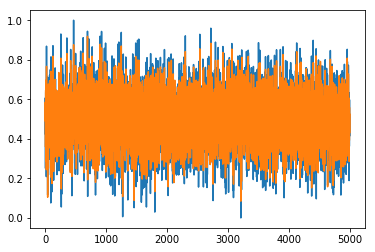

In [72]:
plt.plot(y[:,:])
plt.plot(prediction[:,:])